# Parte 1: Importaci√≥n de librer√≠as y carga de datos

In [2]:
!pip install lazypredict
!pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 383.6/383.6 kB 7.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.8/231.8 kB 11.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.5/78.5 kB 5.5 MB/s eta 0:00:00


In [2]:
# Importaci√≥n de librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import ParameterSampler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier
from tqdm.notebook import tqdm  # Para barras de progreso en notebook
# Si est√°s usando script y no notebook, usa:
# from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n visual
plt.style.use('fivethirtyeight')
sns.set_palette("Set2")

# Carga de datos
# URLs de los datasets en GitHub
train_values_url = "https://raw.githubusercontent.com/Saultr21/IA-Y-BIGDATA/refs/heads/main/SNS/SNS_ACT3_7/train_values.csv"
train_labels_url = "https://raw.githubusercontent.com/Saultr21/IA-Y-BIGDATA/refs/heads/main/SNS/SNS_ACT3_7/train_labels.csv"
test_values_url  = "https://raw.githubusercontent.com/Saultr21/IA-Y-BIGDATA/refs/heads/main/SNS/SNS_ACT3_7/test_values.csv"

# Cargar los datasets
train_values = pd.read_csv(train_values_url)
train_labels = pd.read_csv(train_labels_url)
test_values  = pd.read_csv(test_values_url)
print("Dimensiones del conjunto de datos de entrenamiento (features):", train_values.shape)
print("Dimensiones del conjunto de datos de entrenamiento (labels):", train_labels.shape)
print("Dimensiones del conjunto de datos de prueba:", test_values.shape)

# Verificar los primeros registros
train_values.head()

Dimensiones del conjunto de datos de entrenamiento (features): (260601, 39)
Dimensiones del conjunto de datos de entrenamiento (labels): (260601, 2)
Dimensiones del conjunto de datos de prueba: (86868, 39)


building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

# Parte 2: An√°lisis Exploratorio de Datos (EDA)

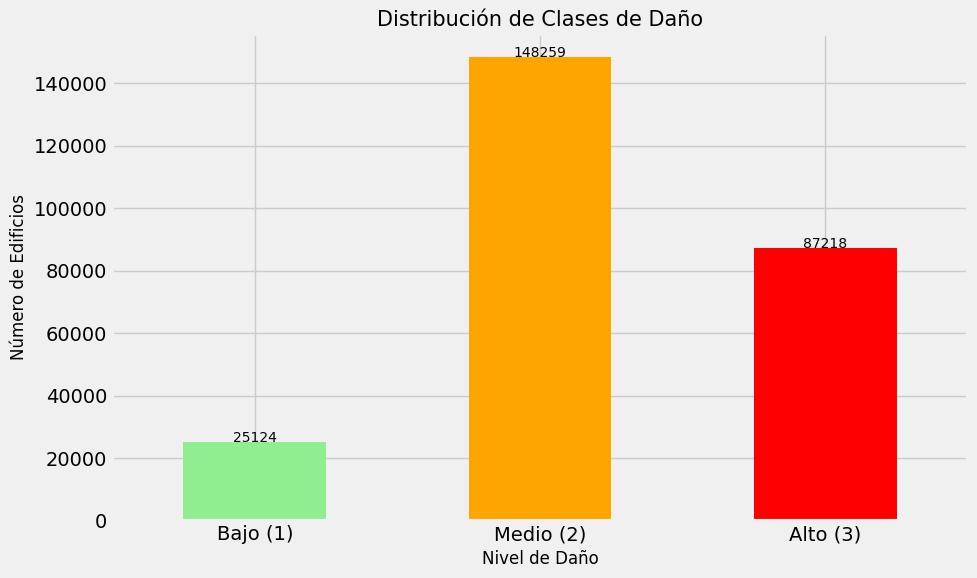

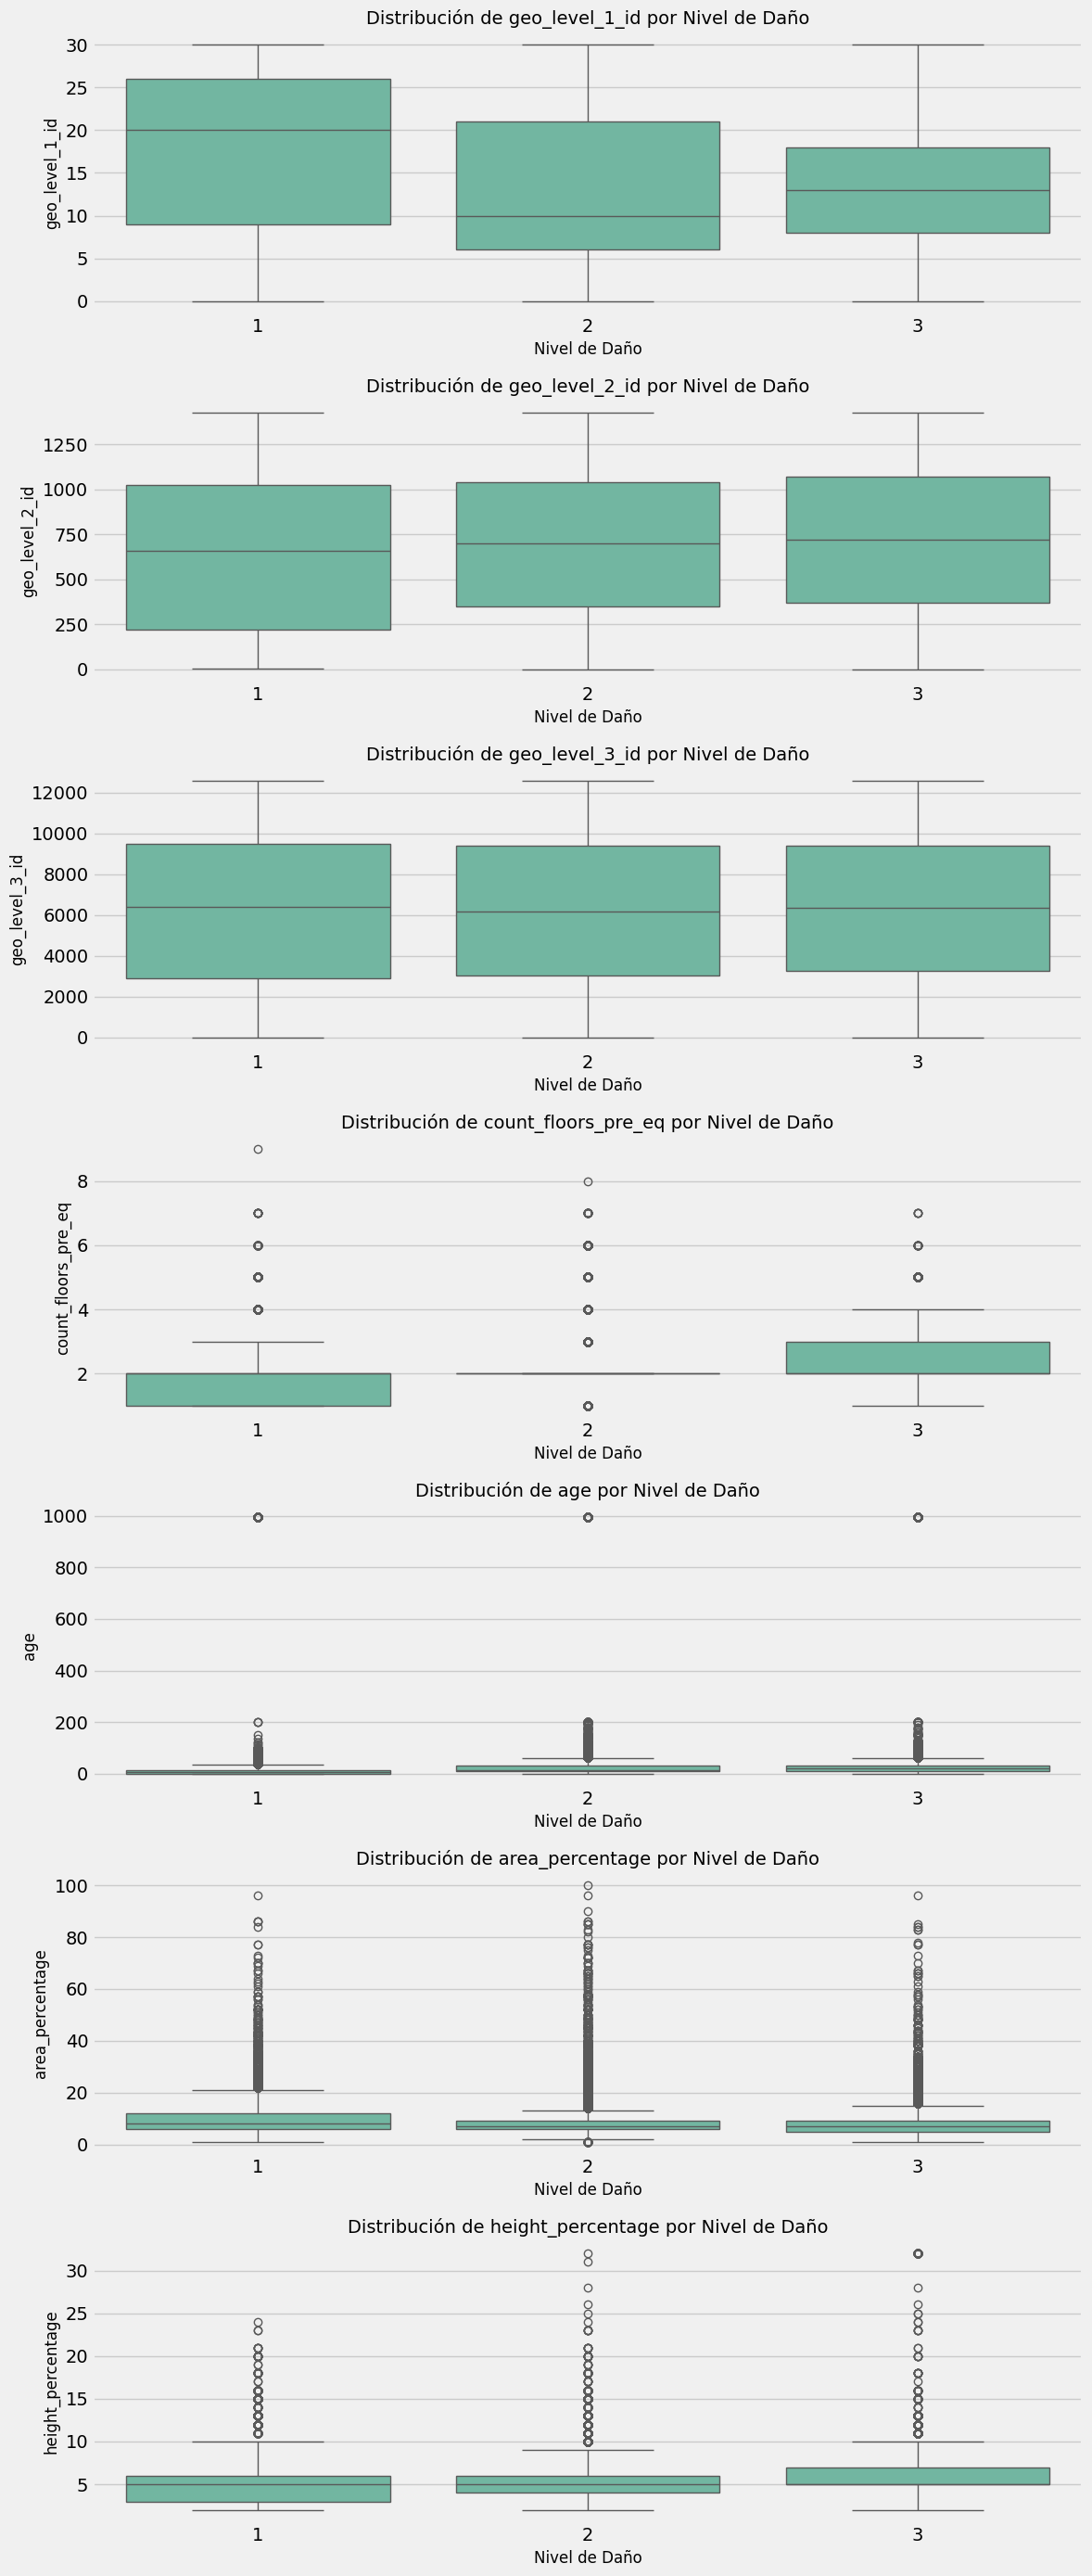

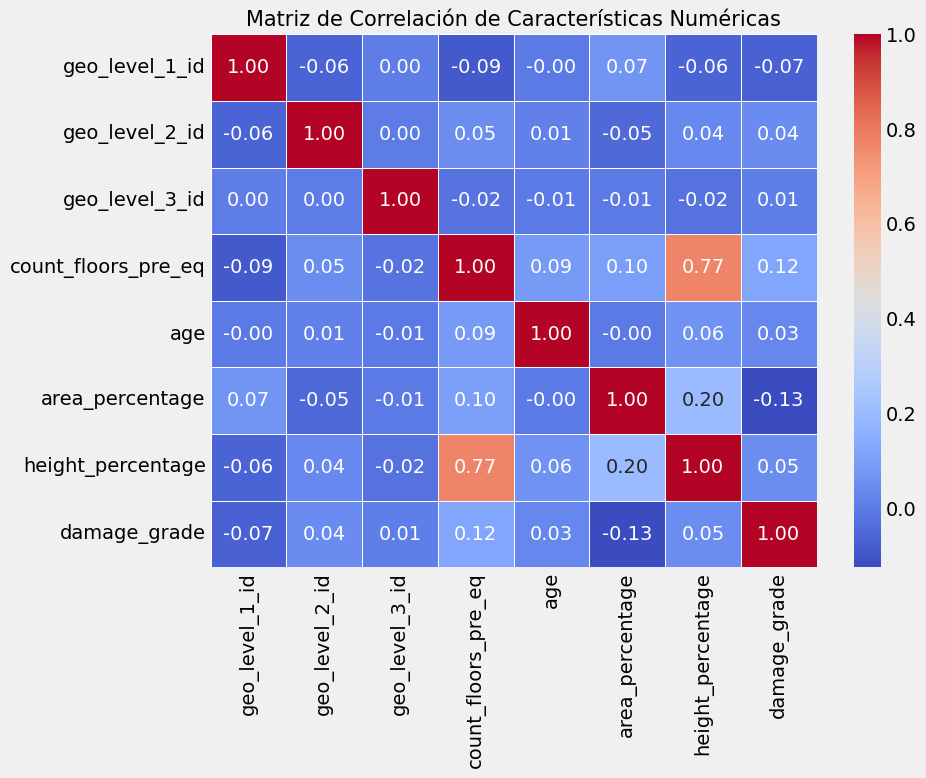

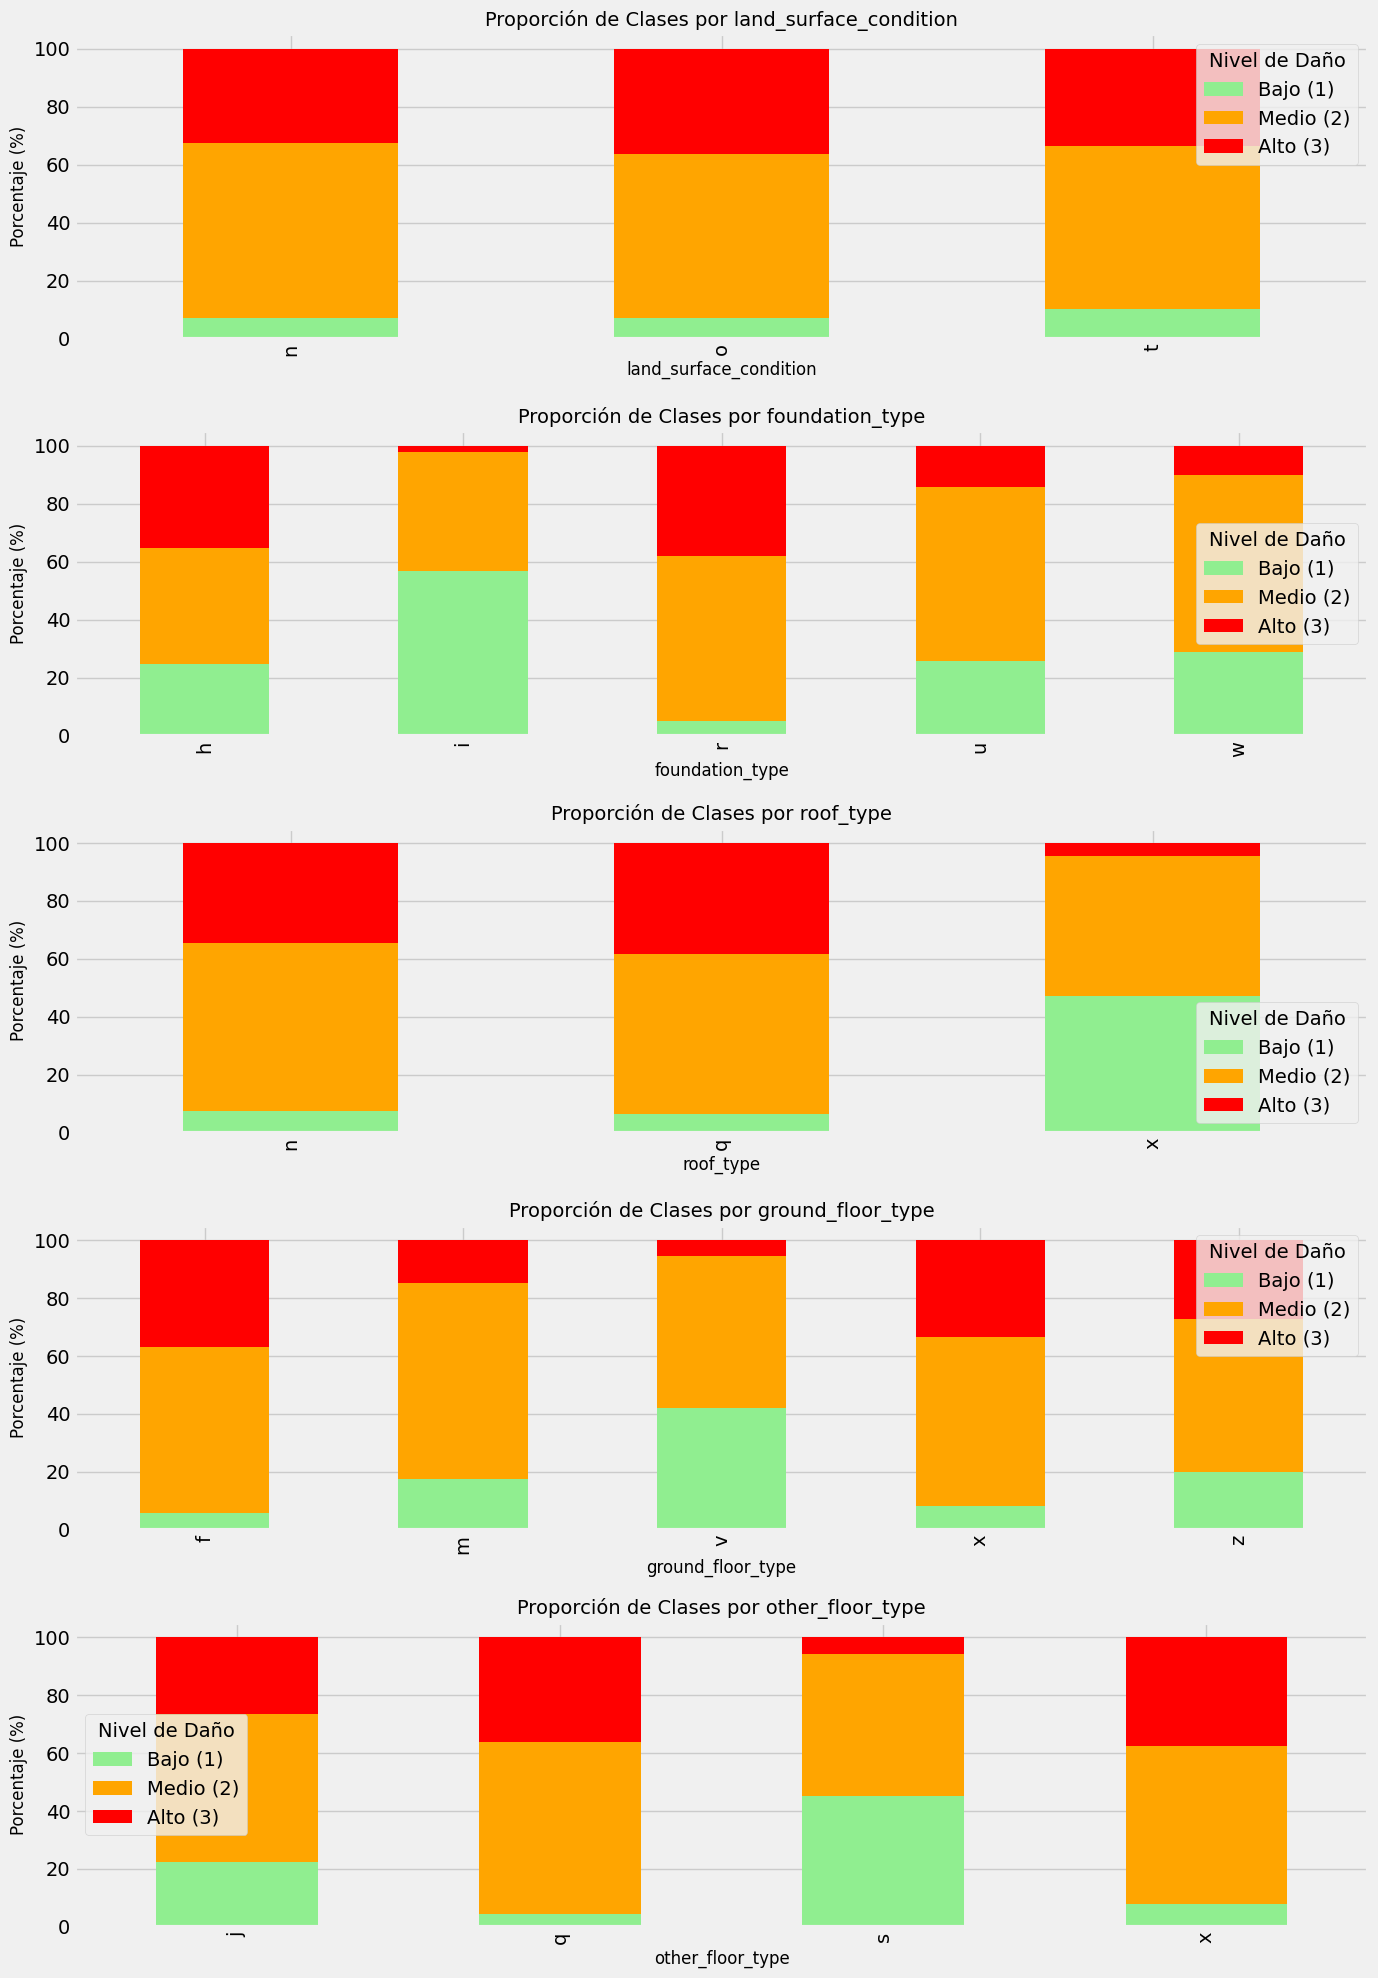

Se identificaron 22 columnas binarias


geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
count       260601.00       260601.00       260601.00            260601.00   
mean            13.90          701.07         6257.88                 2.13   
std              8.03          412.71         3646.37                 0.73   
min              0.00            0.00            0.00                 1.00   
25%              7.00          350.00         3073.00                 2.00   
50%             12.00          702.00         6270.00                 2.00   
75%             21.00         1050.00         9412.00                 2.00   
max             30.00         1427.00        12567.00                 9.00   

            age  area_percentage  height_percentage  
count 260601.00        260601.00          260601.00  
mean      26.54             8.02               5.43  
std       73.57             4.39               1.92  
min        0.00             1.00               2.00  
25%       10.00             5.00               4.00  
50%       15.00             7.00               5.00  
75%       30.00             9.00               6.00  
max      995.00           100.00              32.00

In [3]:
# Fusionar datos de entrenamiento y etiquetas para el an√°lisis
train_data = pd.merge(train_values, train_labels, on="building_id")

# Explorar distribuci√≥n de la variable objetivo
plt.figure(figsize=(10, 6))
damage_counts = train_data['damage_grade'].value_counts().sort_index()
ax = damage_counts.plot(kind='bar', color=['lightgreen', 'orange', 'red'])
plt.title('Distribuci√≥n de Clases de Da√±o', fontsize=15)
plt.xlabel('Nivel de Da√±o', fontsize=12)
plt.ylabel('N√∫mero de Edificios', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Bajo (1)', 'Medio (2)', 'Alto (3)'], rotation=0)

# Agregar valores sobre las barras
for i, v in enumerate(damage_counts):
    ax.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Explorar caracter√≠sticas num√©ricas
numerical_features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq',
                      'age', 'area_percentage', 'height_percentage']

fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, 4*len(numerical_features)))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='damage_grade', y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(f'Distribuci√≥n de {feature} por Nivel de Da√±o', fontsize=14)
    axes[i].set_xlabel('Nivel de Da√±o', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

# Matriz de correlaci√≥n de caracter√≠sticas num√©ricas
plt.figure(figsize=(10, 8))
correlation_matrix = train_data[numerical_features + ['damage_grade']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaci√≥n de Caracter√≠sticas Num√©ricas', fontsize=15)
plt.tight_layout()
plt.show()

# An√°lisis de caracter√≠sticas categ√≥ricas
categorical_features = ['land_surface_condition', 'foundation_type', 'roof_type',
                       'ground_floor_type', 'other_floor_type']

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(14, 4*len(categorical_features)))
for i, feature in enumerate(categorical_features):
    # Calcular proporci√≥n de cada categor√≠a para cada clase de da√±o
    cat_proportions = pd.crosstab(train_data[feature], train_data['damage_grade'],
                                   normalize='index') * 100
    cat_proportions.plot(kind='bar', stacked=True, ax=axes[i],
                          color=['lightgreen', 'orange', 'red'])
    axes[i].set_title(f'Proporci√≥n de Clases por {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Porcentaje (%)', fontsize=12)
    axes[i].legend(title='Nivel de Da√±o', labels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])

plt.tight_layout()
plt.show()

# Identificar columnas binarias (codificadas como 0-1)
binary_columns = []
for col in train_values.columns:
    unique_vals = train_values[col].unique()
    if len(unique_vals) == 2 and set(unique_vals).issubset({0, 1}):
        binary_columns.append(col)

print(f"Se identificaron {len(binary_columns)} columnas binarias")

# Resumen estad√≠stico de caracter√≠sticas num√©ricas importantes
train_data[numerical_features].describe()

# Parte 3: Selecci√≥n de caracter√≠sticas usando dendrogramas

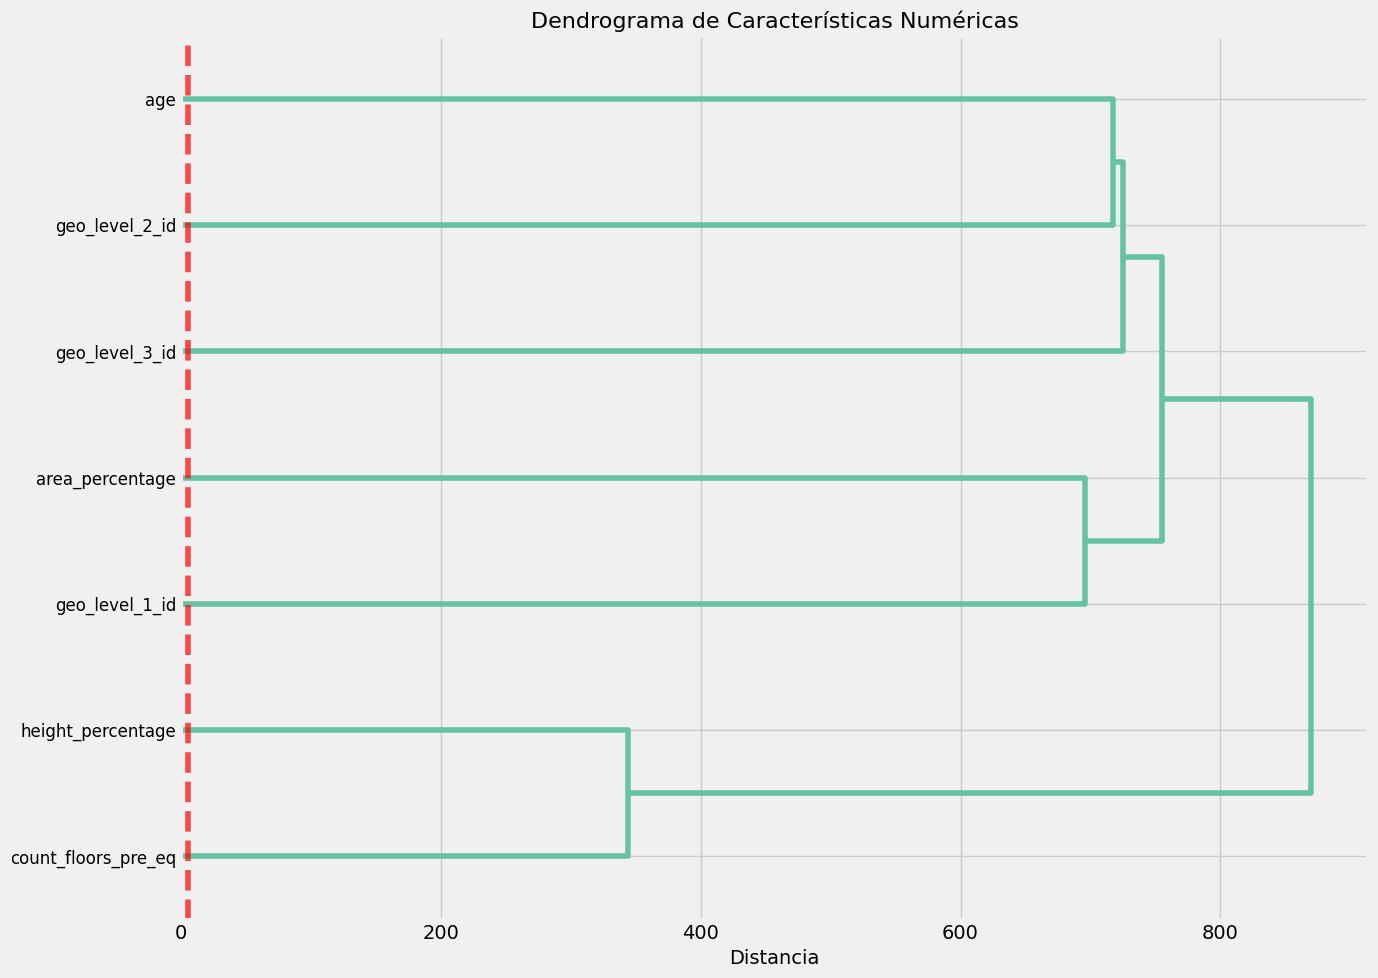

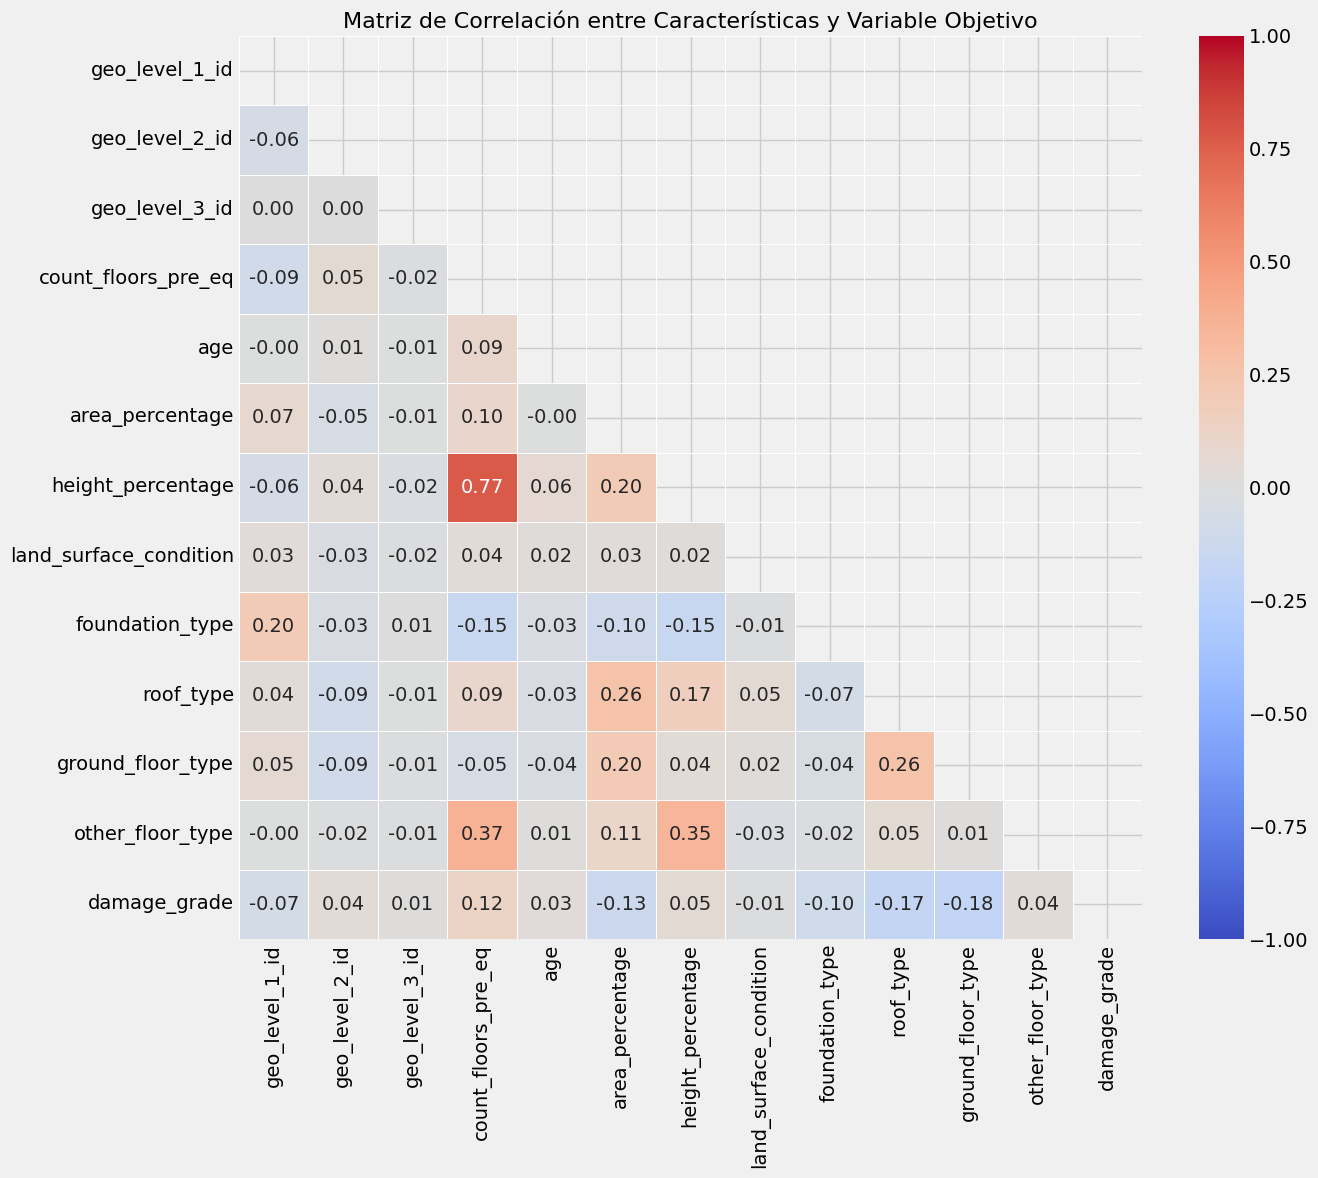

Caracter√≠sticas seleccionadas para modelado: ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered']


In [4]:
# Preparaci√≥n de datos para dendrograma
# Seleccionamos caracter√≠sticas num√©ricas
X_numerical = train_data[numerical_features].copy()

# Escalamos los datos para el dendrograma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Creamos el dendrograma
plt.figure(figsize=(14, 10))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_scaled.T, method='ward'),  # Transpuesta para clustering de caracter√≠sticas
    labels=X_numerical.columns,
    orientation='right',
    leaf_font_size=12,
    color_threshold=5
)
plt.title('Dendrograma de Caracter√≠sticas Num√©ricas', fontsize=16)
plt.xlabel('Distancia', fontsize=14)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# An√°lisis de correlaci√≥n entre caracter√≠sticas categ√≥ricas y num√©ricas
# Para esto, convertiremos las categ√≥ricas a num√©ricas temporalmente

# Funci√≥n para convertir caracter√≠sticas categ√≥ricas a num√©ricas
def convert_categorical_to_numeric(df, categorical_cols):
    df_encoded = df.copy()
    for col in categorical_cols:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    return df_encoded

categorical_cols = [col for col in train_data.columns
                   if train_data[col].dtype == 'object' and col not in ['building_id']]

train_data_encoded = convert_categorical_to_numeric(train_data, categorical_cols)

# Seleccionamos un subset de columnas para el heatmap (para evitar sobrecarga visual)
selected_features = numerical_features + categorical_cols[:5]  # Primeras 5 categ√≥ricas
selected_features.append('damage_grade')  # A√±adir variable objetivo

plt.figure(figsize=(14, 12))
correlation = train_data_encoded[selected_features].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlaci√≥n entre Caracter√≠sticas y Variable Objetivo', fontsize=16)
plt.tight_layout()
plt.show()

# Basado en el dendrograma y la correlaci√≥n, seleccionamos las caracter√≠sticas relevantes
selected_features = [
    'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
    'land_surface_condition', 'foundation_type', 'roof_type',
    'ground_floor_type', 'other_floor_type'
]

# Podemos a√±adir algunas caracter√≠sticas adicionales basadas en el dominio
selected_features += [col for col in binary_columns[:10]]  # A√±adir primeras 10 columnas binarias

print("Caracter√≠sticas seleccionadas para modelado:", selected_features)

# Parte 3.5: Selecci√≥n de caracter√≠sticas adicional

===== SELECCI√ìN DE CARACTER√çSTICAS ADICIONAL =====

--- Selecci√≥n basada en prueba F (ANOVA) ---
Top 20 caracter√≠sticas seg√∫n prueba F:


Caracter√≠stica  Puntuaci√≥n F  P-valor
38                            damage_grade           inf     0.00
15     has_superstructure_mud_mortar_stone      16490.39     0.00
19  has_superstructure_cement_mortar_brick      11120.19     0.00
23        has_superstructure_rc_engineered       7757.59     0.00
9                                roof_type       6944.70     0.00
10                       ground_floor_type       5750.58     0.00
22    has_superstructure_rc_non_engineered       4721.92     0.00
0                           geo_level_1_id       2657.79     0.00
3                      count_floors_pre_eq       2544.84     0.00
5                          area_percentage       2529.05     0.00
29                 has_secondary_use_hotel       1537.67     0.00
30                has_secondary_use_rental       1342.10     0.00
8                          foundation_type       1341.40     0.00
25                  legal_ownership_status       1212.06     0.00
27                       has_secondary_use        841.80     0.00
14            has_superstructure_adobe_mud        739.41     0.00
20               has_superstructure_timber        659.20     0.00
16           has_superstructure_stone_flag        576.44     0.00
21               has_superstructure_bamboo        538.55     0.00
18     has_superstructure_mud_mortar_brick        531.78     0.00

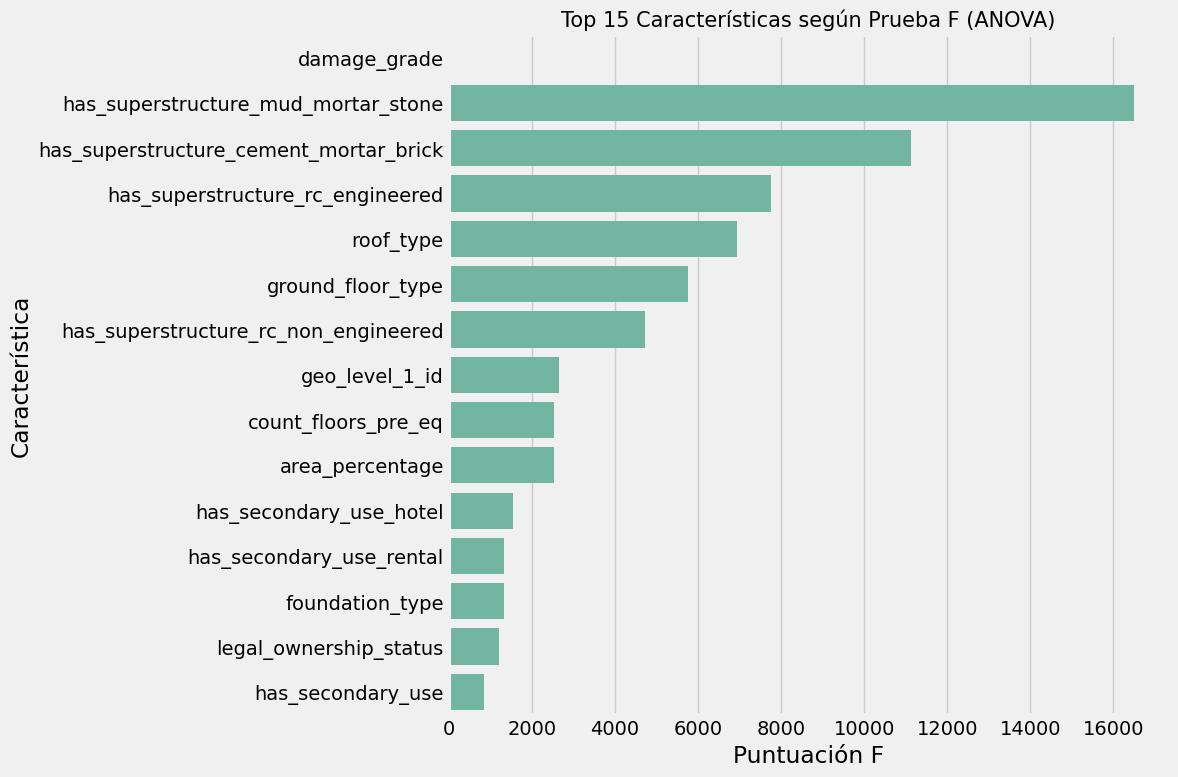


--- Selecci√≥n basada en Informaci√≥n Mutua ---
Top 20 caracter√≠sticas seg√∫n Informaci√≥n Mutua:


Caracter√≠stica  Informaci√≥n Mutua
38                            damage_grade               0.94
2                           geo_level_3_id               0.29
1                           geo_level_2_id               0.24
0                           geo_level_1_id               0.13
8                          foundation_type               0.08
15     has_superstructure_mud_mortar_stone               0.08
11                        other_floor_type               0.06
10                       ground_floor_type               0.05
9                                roof_type               0.04
3                      count_floors_pre_eq               0.03
4                                      age               0.03
19  has_superstructure_cement_mortar_brick               0.03
26                          count_families               0.03
25                  legal_ownership_status               0.03
6                        height_percentage               0.02
7                   land_surface_condition               0.02
13                      plan_configuration               0.02
23        has_superstructure_rc_engineered               0.02
12                                position               0.02
5                          area_percentage               0.01

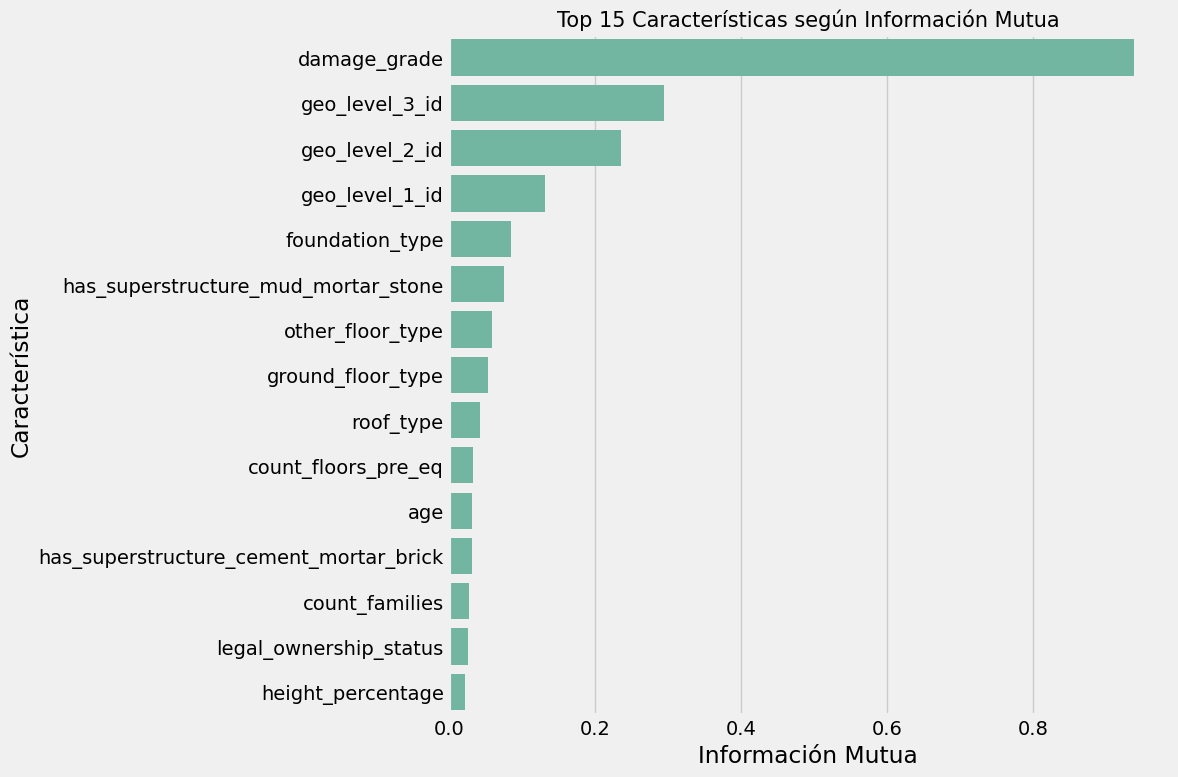


--- Selecci√≥n basada en Importancia de Caracter√≠sticas (RandomForest) ---
Top 20 caracter√≠sticas seg√∫n RandomForest:


Caracter√≠stica  Importancia
38                            damage_grade         0.88
0                           geo_level_1_id         0.02
8                          foundation_type         0.01
15     has_superstructure_mud_mortar_stone         0.01
9                                roof_type         0.01
1                           geo_level_2_id         0.01
4                                      age         0.01
10                       ground_floor_type         0.01
2                           geo_level_3_id         0.01
19  has_superstructure_cement_mortar_brick         0.01
5                          area_percentage         0.01
6                        height_percentage         0.00
3                      count_floors_pre_eq         0.00
11                        other_floor_type         0.00
23        has_superstructure_rc_engineered         0.00
20               has_superstructure_timber         0.00
18     has_superstructure_mud_mortar_brick         0.00
12                                position         0.00
14            has_superstructure_adobe_mud         0.00
26                          count_families         0.00

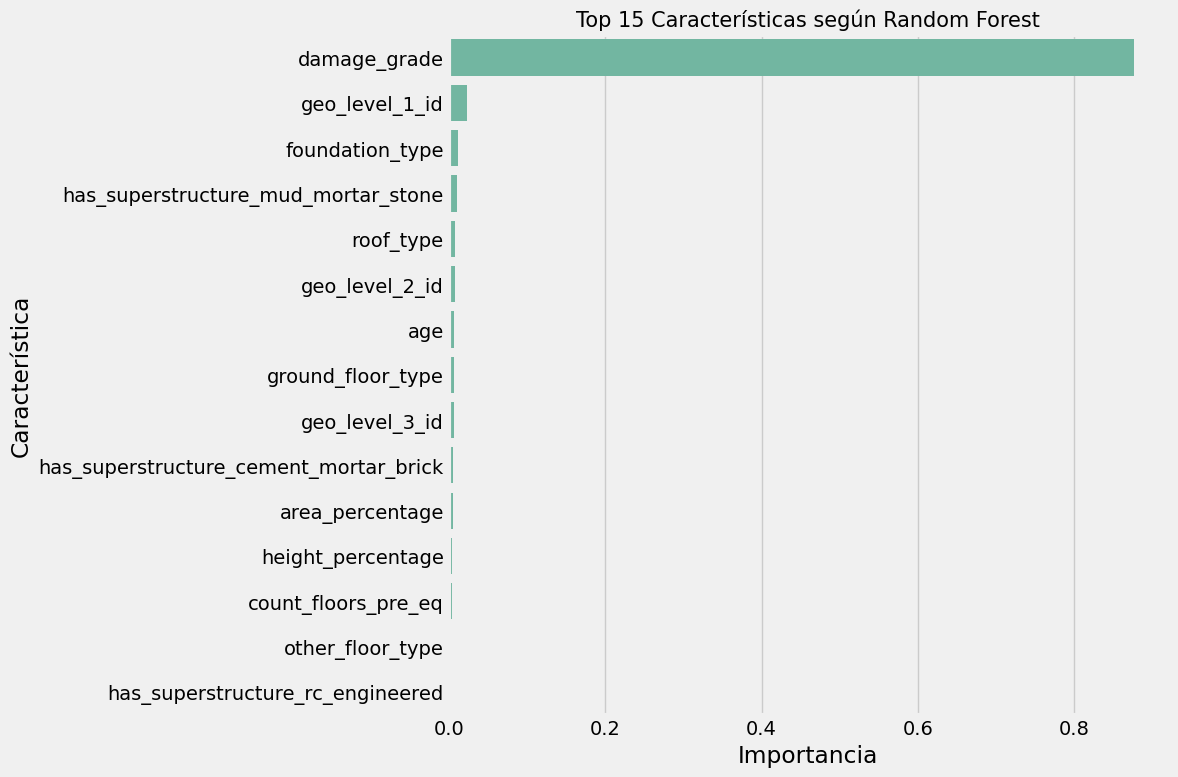


Caracter√≠sticas seleccionadas autom√°ticamente por RandomForest (threshold='mean'): 1
['damage_grade']

--- An√°lisis de Componentes Principales ---
N√∫mero de componentes necesarios para explicar 95% de la varianza: 34


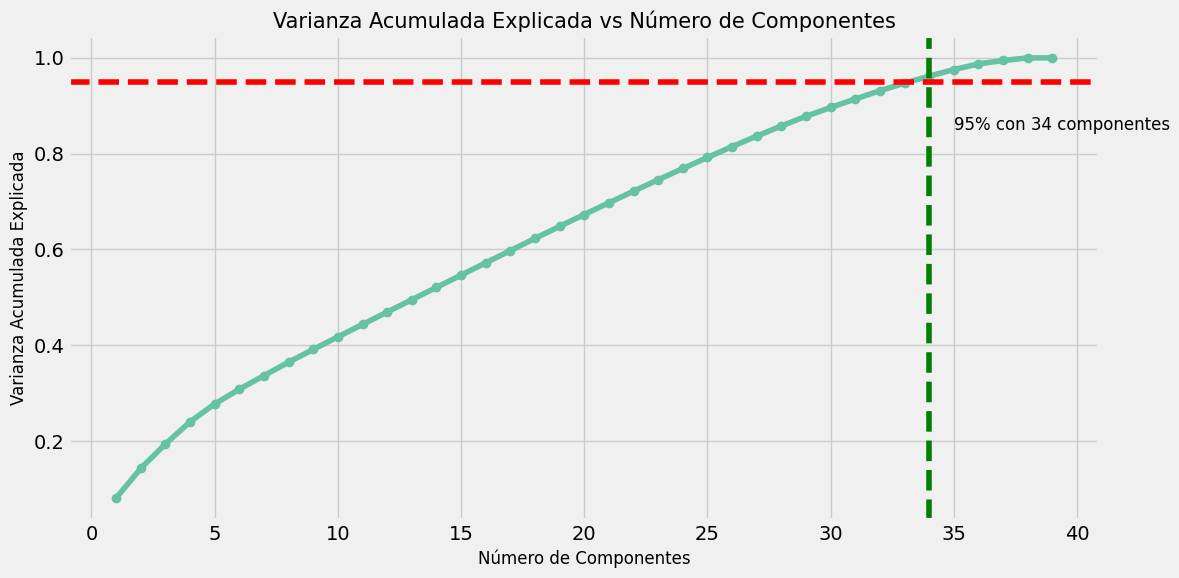


--- Caracter√≠sticas comunes entre m√©todos de selecci√≥n ---
Caracter√≠sticas comunes en ANOVA y MI: 11
Caracter√≠sticas comunes en ANOVA y RF: 13
Caracter√≠sticas comunes en MI y RF: 17
Caracter√≠sticas comunes en los tres m√©todos: 10
Caracter√≠sticas comunes en los tres m√©todos:
['area_percentage', 'count_floors_pre_eq', 'damage_grade', 'foundation_type', 'geo_level_1_id', 'ground_floor_type', 'has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_stone', 'has_superstructure_rc_engineered', 'roof_type']

--- Selecci√≥n final de caracter√≠sticas ---
Total de caracter√≠sticas seleccionadas: 21
Lista final de caracter√≠sticas seleccionadas:
['age', 'area_percentage', 'count_families', 'count_floors_pre_eq', 'damage_grade', 'foundation_type', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'ground_floor_type', 'has_superstructure_adobe_mud', 'has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_brick', 'has_superstructure_mud_mortar_stone', 

In [5]:
# Importaci√≥n de bibliotecas espec√≠ficas para selecci√≥n de caracter√≠sticas
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

print("===== SELECCI√ìN DE CARACTER√çSTICAS ADICIONAL =====")

# 1. Preparaci√≥n de datos para selecci√≥n de caracter√≠sticas
# Convertimos caracter√≠sticas categ√≥ricas a num√©ricas para an√°lisis estad√≠sticos
X_encoded = convert_categorical_to_numeric(train_data, categorical_cols)
X_encoded = X_encoded.drop(['building_id'], axis=1)
y = train_data['damage_grade']

# 2. M√©todo 1: An√°lisis univariante usando prueba F (ANOVA F-test)
print("\n--- Selecci√≥n basada en prueba F (ANOVA) ---")
k_best_features = 20  # Seleccionamos top 20 caracter√≠sticas
selector_f = SelectKBest(f_classif, k=k_best_features)
X_kbest = selector_f.fit_transform(X_encoded, y)

# Obtener puntuaciones y nombres de las caracter√≠sticas seleccionadas
feature_scores = pd.DataFrame({
    'Caracter√≠stica': X_encoded.columns,
    'Puntuaci√≥n F': selector_f.scores_,
    'P-valor': selector_f.pvalues_
})

# Ordenar por puntuaci√≥n descendente y mostrar top 20
top_features_f = feature_scores.sort_values('Puntuaci√≥n F', ascending=False).head(20)
print("Top 20 caracter√≠sticas seg√∫n prueba F:")
display(top_features_f)

# Visualizaci√≥n de las principales caracter√≠sticas seg√∫n ANOVA
plt.figure(figsize=(12, 8))
sns.barplot(x='Puntuaci√≥n F', y='Caracter√≠stica', data=top_features_f.head(15))
plt.title('Top 15 Caracter√≠sticas seg√∫n Prueba F (ANOVA)', fontsize=15)
plt.tight_layout()
plt.show()

# 3. M√©todo 2: Informaci√≥n Mutua (captura relaciones no lineales)
print("\n--- Selecci√≥n basada en Informaci√≥n Mutua ---")
selector_mi = SelectKBest(mutual_info_classif, k=k_best_features)
X_mi = selector_mi.fit_transform(X_encoded, y)

# Obtener puntuaciones
feature_scores_mi = pd.DataFrame({
    'Caracter√≠stica': X_encoded.columns,
    'Informaci√≥n Mutua': selector_mi.scores_
})

# Ordenar por puntuaci√≥n descendente y mostrar top 20
top_features_mi = feature_scores_mi.sort_values('Informaci√≥n Mutua', ascending=False).head(20)
print("Top 20 caracter√≠sticas seg√∫n Informaci√≥n Mutua:")
display(top_features_mi)

# Visualizaci√≥n de las principales caracter√≠sticas seg√∫n Informaci√≥n Mutua
plt.figure(figsize=(12, 8))
sns.barplot(x='Informaci√≥n Mutua', y='Caracter√≠stica', data=top_features_mi.head(15))
plt.title('Top 15 Caracter√≠sticas seg√∫n Informaci√≥n Mutua', fontsize=15)
plt.tight_layout()
plt.show()

# 4. M√©todo 3: Importancia de caracter√≠sticas con RandomForest
print("\n--- Selecci√≥n basada en Importancia de Caracter√≠sticas (RandomForest) ---")
feature_selector_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
feature_selector_rf.fit(X_encoded, y)

# Obtener importancias
feature_importances = pd.DataFrame({
    'Caracter√≠stica': X_encoded.columns,
    'Importancia': feature_selector_rf.feature_importances_
})

# Ordenar por importancia descendente y mostrar top 20
top_features_rf = feature_importances.sort_values('Importancia', ascending=False).head(20)
print("Top 20 caracter√≠sticas seg√∫n RandomForest:")
display(top_features_rf)

# Visualizaci√≥n de las principales caracter√≠sticas seg√∫n RandomForest
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Caracter√≠stica', data=top_features_rf.head(15))
plt.title('Top 15 Caracter√≠sticas seg√∫n Random Forest', fontsize=15)
plt.tight_layout()
plt.show()

# 5. Selecci√≥n autom√°tica de caracter√≠sticas basada en umbral de importancia
selector_model = SelectFromModel(feature_selector_rf, threshold='mean')
X_important = selector_model.fit_transform(X_encoded, y)
selected_features_mask = selector_model.get_support()
selected_features = X_encoded.columns[selected_features_mask]

print(f"\nCaracter√≠sticas seleccionadas autom√°ticamente por RandomForest (threshold='mean'): {len(selected_features)}")
print(sorted(selected_features))

# 6. An√°lisis de Componentes Principales (PCA)
print("\n--- An√°lisis de Componentes Principales ---")
pca = PCA()
X_pca = pca.fit_transform(StandardScaler().fit_transform(X_encoded))

# Varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determinar n√∫mero de componentes para explicar al menos 95% de la varianza
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"N√∫mero de componentes necesarios para explicar 95% de la varianza: {n_components_95}")

# Visualizaci√≥n de la varianza explicada
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components_95, color='g', linestyle='--')
plt.text(n_components_95+1, 0.85, f'95% con {n_components_95} componentes', fontsize=12)
plt.title('Varianza Acumulada Explicada vs N√∫mero de Componentes', fontsize=15)
plt.xlabel('N√∫mero de Componentes', fontsize=12)
plt.ylabel('Varianza Acumulada Explicada', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. An√°lisis final y compilaci√≥n de selecci√≥n de caracter√≠sticas

# Caracter√≠sticas que aparecen en al menos dos m√©todos (ANOVA, MI, RF)
common_features_anova_mi = set(top_features_f['Caracter√≠stica']).intersection(set(top_features_mi['Caracter√≠stica']))
common_features_anova_rf = set(top_features_f['Caracter√≠stica']).intersection(set(top_features_rf['Caracter√≠stica']))
common_features_mi_rf = set(top_features_mi['Caracter√≠stica']).intersection(set(top_features_rf['Caracter√≠stica']))

# Caracter√≠sticas que aparecen en los tres m√©todos
common_features_all = common_features_anova_mi.intersection(set(top_features_rf['Caracter√≠stica']))

print("\n--- Caracter√≠sticas comunes entre m√©todos de selecci√≥n ---")
print(f"Caracter√≠sticas comunes en ANOVA y MI: {len(common_features_anova_mi)}")
print(f"Caracter√≠sticas comunes en ANOVA y RF: {len(common_features_anova_rf)}")
print(f"Caracter√≠sticas comunes en MI y RF: {len(common_features_mi_rf)}")
print(f"Caracter√≠sticas comunes en los tres m√©todos: {len(common_features_all)}")
print("Caracter√≠sticas comunes en los tres m√©todos:")
print(sorted(common_features_all))

# 8. Selecci√≥n final de caracter√≠sticas basada en m√∫ltiples m√©todos

# Combinamos las caracter√≠sticas seleccionadas por diferentes m√©todos
# Incluimos todas las que aparecen en al menos dos m√©todos m√°s las sugeridas por el dendrograma
selected_features_from_dendogram = selected_features  # Las que ya ten√≠amos del dendrograma
selected_features_from_statistical = list(common_features_anova_mi.union(common_features_anova_rf, common_features_mi_rf))

# Caracter√≠sticas finales
final_selected_features = list(set(selected_features_from_dendogram).union(set(selected_features_from_statistical)))

print("\n--- Selecci√≥n final de caracter√≠sticas ---")
print(f"Total de caracter√≠sticas seleccionadas: {len(final_selected_features)}")
print("Lista final de caracter√≠sticas seleccionadas:")
print(sorted(final_selected_features))

# Actualizar la lista de caracter√≠sticas seleccionadas para el modelado
selected_features = final_selected_features

# Parte 4: Preprocesamiento de datos y selecci√≥n de muestra

Estrategia de selecci√≥n de muestra:
- Realizaremos un muestreo estratificado para mantener la distribuci√≥n de clases
- Utilizaremos una selecci√≥n basada en caracter√≠sticas geogr√°ficas para diversificar la muestra
- Seleccionaremos edificios con diferentes caracter√≠sticas estructurales
Muestra final: 19879 edificios


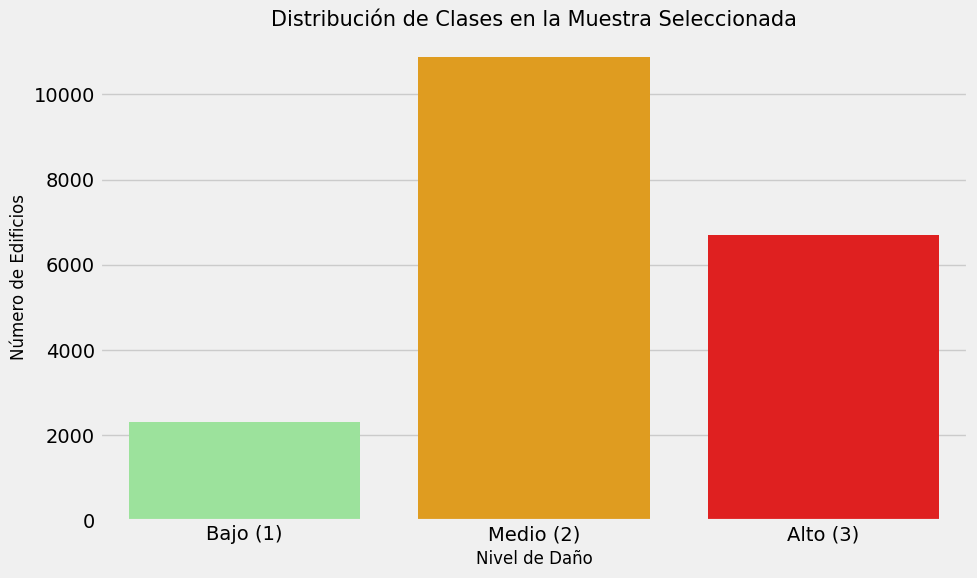

Tama√±o conjunto entrenamiento: 15903 muestras
Tama√±o conjunto prueba: 3976 muestras


In [6]:
# Preprocesamiento de datos
X = train_data.drop(['building_id', 'damage_grade'], axis=1)
y = train_data['damage_grade']

# Identificar tipos de caracter√≠sticas
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Justificaci√≥n para la selecci√≥n de la muestra
print("Estrategia de selecci√≥n de muestra:")
print("- Realizaremos un muestreo estratificado para mantener la distribuci√≥n de clases")
print("- Utilizaremos una selecci√≥n basada en caracter√≠sticas geogr√°ficas para diversificar la muestra")
print("- Seleccionaremos edificios con diferentes caracter√≠sticas estructurales")

# Selecci√≥n de muestra justificada (no aleatoria)
# Agrupamos por niveles geogr√°ficos y tomamos un subconjunto representativo

def advanced_sampling(df, y, sample_size=20000):
    """
    Funci√≥n para realizar un muestreo estratificado pero determin√≠stico
    basado en caracter√≠sticas importantes del dominio
    """
    # Aseguramos que tengamos representaci√≥n de diferentes regiones geogr√°ficas
    geo_groups = df.groupby(['geo_level_1_id', 'geo_level_2_id'])

    # Inicializar el DataFrame para la muestra
    sampled_indices = []

    # Para cada grupo geogr√°fico, seleccionamos ejemplos representativos
    for name, group in geo_groups:
        # Determinamos cu√°ntas muestras tomar de este grupo (proporcional a su tama√±o)
        group_size = len(group)
        group_sample_size = max(1, int(group_size / len(df) * sample_size))

        # Estratificamos por nivel de da√±o dentro de cada grupo geogr√°fico
        for damage_level in [1, 2, 3]:
            damage_indices = group[y == damage_level].index
            if len(damage_indices) > 0:
                # Tomamos un n√∫mero proporcional de cada nivel de da√±o
                damage_ratio = sum(y[group.index] == damage_level) / group_size
                damage_sample_size = max(1, int(group_sample_size * damage_ratio))

                # Seleccionamos √≠ndices de forma determin√≠stica (no aleatoria)
                # Usamos caracter√≠sticas como edad y n√∫mero de pisos para ordenar
                sorted_indices = df.loc[damage_indices].sort_values(
                    by=['age', 'count_floors_pre_eq', 'area_percentage']
                ).index[:damage_sample_size]

                sampled_indices.extend(sorted_indices)

    # Si no alcanzamos el tama√±o deseado, completamos con m√°s muestras
    if len(sampled_indices) < sample_size:
        remaining = sample_size - len(sampled_indices)
        # Seleccionamos m√°s edificios basados en otras caracter√≠sticas
        additional_indices = df.sort_values(
            by=['foundation_type', 'roof_type', 'height_percentage']
        ).index[:remaining]
        sampled_indices.extend([idx for idx in additional_indices if idx not in sampled_indices])

    # Limitamos al tama√±o deseado
    sampled_indices = sampled_indices[:sample_size]

    print(f"Muestra final: {len(sampled_indices)} edificios")

    return df.loc[sampled_indices], y.loc[sampled_indices]

# Seleccionamos un subconjunto manejable de datos
X_sampled, y_sampled = advanced_sampling(X, y, sample_size=20000)

# Verificamos la distribuci√≥n de clases en la muestra
plt.figure(figsize=(10, 6))
sns.countplot(x=y_sampled, palette=['lightgreen', 'orange', 'red'])
plt.title('Distribuci√≥n de Clases en la Muestra Seleccionada', fontsize=15)
plt.xlabel('Nivel de Da√±o', fontsize=12)
plt.ylabel('N√∫mero de Edificios', fontsize=12)
plt.xticks([0, 1, 2], ['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.tight_layout()
plt.show()

# Divisi√≥n en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42, stratify=y_sampled
)

print(f"Tama√±o conjunto entrenamiento: {X_train.shape[0]} muestras")
print(f"Tama√±o conjunto prueba: {X_test.shape[0]} muestras")

# Definimos el preprocesador para manejar columnas num√©ricas y categ√≥ricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Preprocesamos los datos
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Guardamos el preprocesador para usarlo m√°s tarde con los datos de prueba
import pickle
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

# Parte 5: LazyPredict para comparaci√≥n inicial de modelos

 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 31/32 [01:35<00:03,  3.71s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 15903, number of used features: 58
[LightGBM] [Info] Start training from score -2.147545
[LightGBM] [Info] Start training from score -0.604105
[LightGBM] [Info] Start training from score -1.088664


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [01:36<00:00,  3.02s/it]

Comparaci√≥n de modelos con LazyPredict:


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.71               0.62    None      0.70   
BaggingClassifier                  0.69               0.60    None      0.68   
RandomForestClassifier             0.68               0.59    None      0.67   
DecisionTreeClassifier             0.62               0.56    None      0.62   
BernoulliNB                        0.46               0.56    None      0.43   
NearestCentroid                    0.42               0.55    None      0.35   
ExtraTreesClassifier               0.64               0.55    None      0.63   
GaussianNB                         0.38               0.53    None      0.25   
KNeighborsClassifier               0.58               0.51    None      0.57   
LinearDiscriminantAnalysis         0.58               0.50    None      0.56   
ExtraTreeClassifier                0.56               0.50    None      0.56   
LabelSpreading                     0.53               0.48    None      0.54   
Perceptron                         0.51               0.48    None      0.51   
LabelPropagation                   0.53               0.48    None      0.54   
SVC                                0.61               0.48    None      0.58   
LogisticRegression                 0.59               0.47    None      0.56   
AdaBoostClassifier                 0.62               0.47    None      0.59   
PassiveAggressiveClassifier        0.48               0.47    None      0.49   
SGDClassifier                      0.57               0.46    None      0.55   
QuadraticDiscriminantAnalysis      0.30               0.45    None      0.25   
CalibratedClassifierCV             0.58               0.45    None      0.55   
LinearSVC                          0.58               0.43    None      0.54   
RidgeClassifier                    0.58               0.42    None      0.53   
RidgeClassifierCV                  0.58               0.42    None      0.53   
DummyClassifier                    0.55               0.33    None      0.39   

                               Time Taken  
Model                                      
LGBMClassifier                       1.03  
BaggingClassifier                    1.24  
RandomForestClassifier               3.26  
DecisionTreeClassifier               0.26  
BernoulliNB                          0.12  
NearestCentroid                      0.11  
ExtraTreesClassifier                 4.16  
GaussianNB                           0.12  
KNeighborsClassifier                 1.06  
LinearDiscriminantAnalysis           0.27  
ExtraTreeClassifier                  0.10  
LabelSpreading                      25.54  
Perceptron                           0.25  
LabelPropagation                    16.84  
SVC                                 30.47  
LogisticRegression                   0.44  
AdaBoostClassifier                   1.45  
PassiveAggressiveClassifier          0.28  
SGDClassifier                        2.27  
QuadraticDiscriminantAnalysis        0.21  
CalibratedClassifierCV               4.86  
LinearSVC                            1.42  
RidgeClassifier                      0.12  
RidgeClassifierCV                    0.27  
DummyClassifier                      0.06

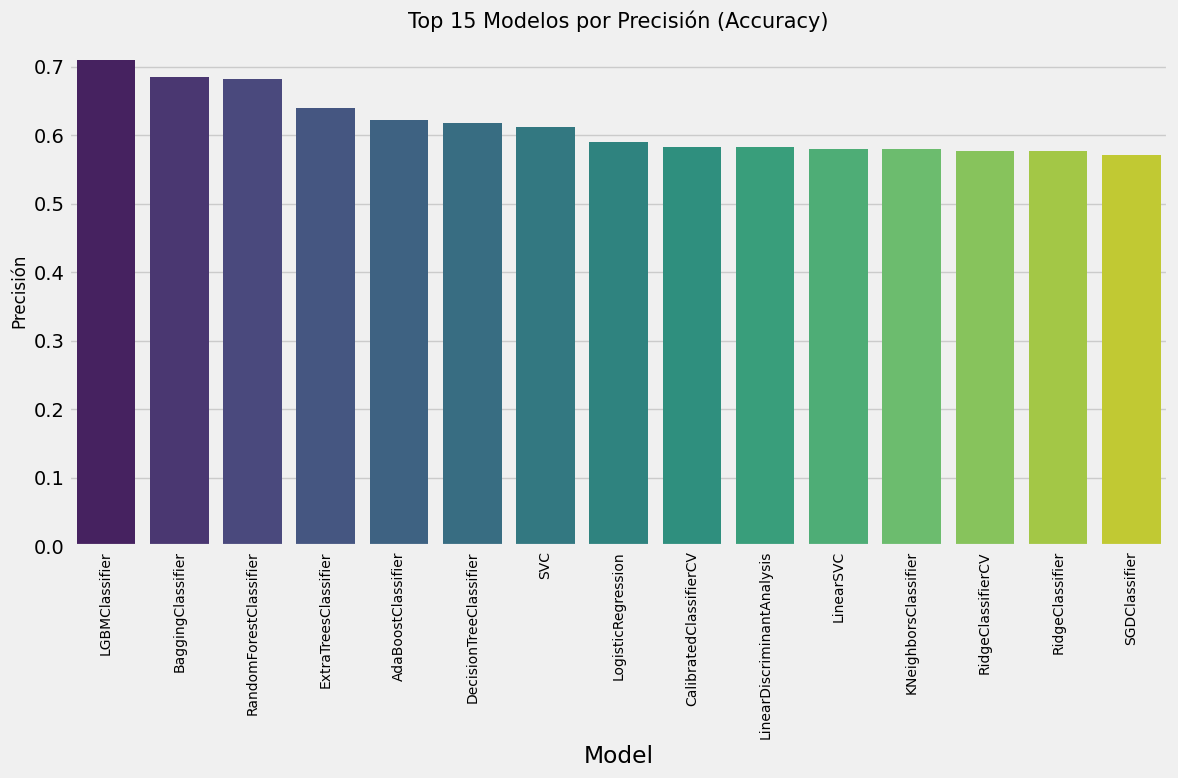

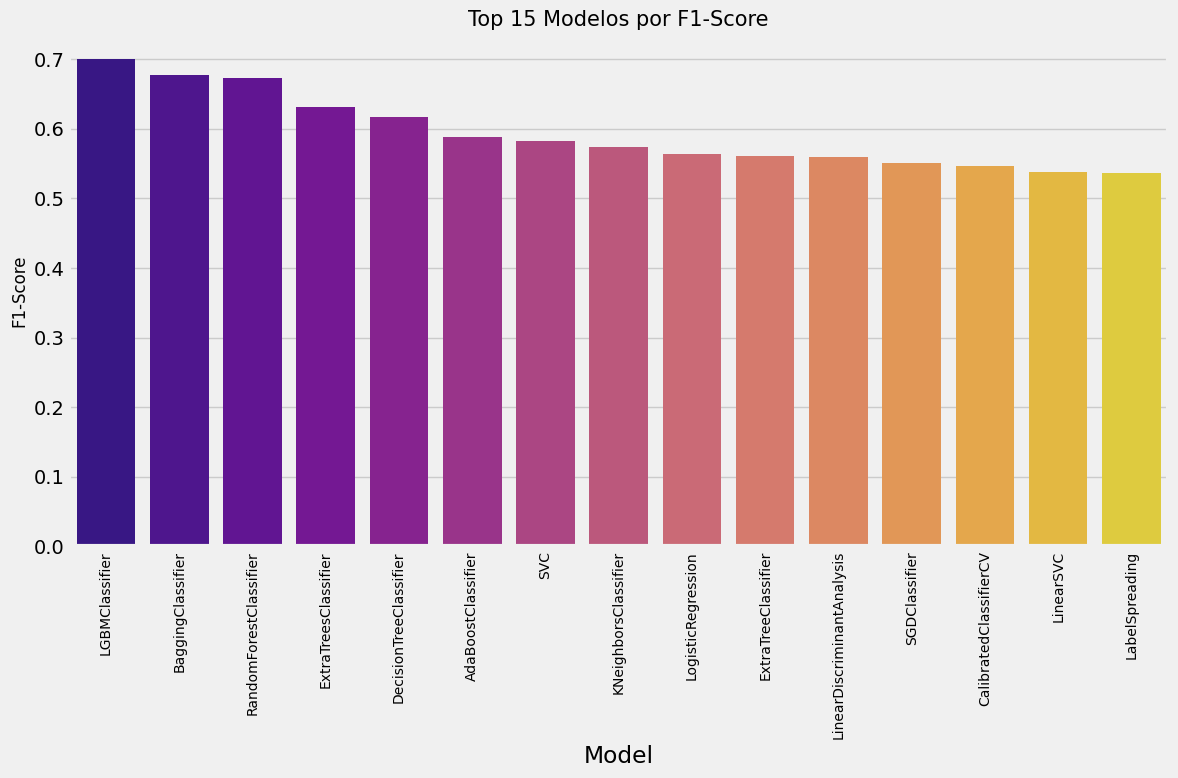

Basado en los resultados de LazyPredict, implementaremos los siguientes modelos:
1. LGBMClassifier (Light Gradient Boosting Machine)
2. BaggingClassifier
3. RandomForestClassifier
4. SVC (Support Vector Classifier)


In [7]:
# Ejecutamos LazyPredict para comparar m√∫ltiples modelos r√°pidamente
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_processed, X_test_processed, y_train, y_test)

# Mostramos los resultados de todos los modelos
print("Comparaci√≥n de modelos con LazyPredict:")
display(models)

# Visualizaci√≥n de los resultados
plt.figure(figsize=(12, 8))
models_accuracy = models.sort_values(by='Accuracy', ascending=False)[:15]
sns.barplot(x=models_accuracy.index, y=models_accuracy['Accuracy'], palette='viridis')
plt.title('Top 15 Modelos por Precisi√≥n (Accuracy)', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Precisi√≥n', fontsize=12)
plt.tight_layout()
plt.show()

# Tambi√©n analizamos el F1-score, que es nuestra m√©trica principal
plt.figure(figsize=(12, 8))
models_f1 = models.sort_values(by='F1 Score', ascending=False)[:15]
sns.barplot(x=models_f1.index, y=models_f1['F1 Score'], palette='plasma')
plt.title('Top 15 Modelos por F1-Score', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('F1-Score', fontsize=12)
plt.tight_layout()
plt.show()

print("Basado en los resultados de LazyPredict, implementaremos los siguientes modelos:")
print("1. LGBMClassifier (Light Gradient Boosting Machine)")
print("2. BaggingClassifier")
print("3. RandomForestClassifier")
print("4. SVC (Support Vector Classifier)")

# Parte 6: Implementaci√≥n y optimizaci√≥n del modelo LGBMClassifier

Iniciando optimizaci√≥n para m√°xima precisi√≥n general...


Optimizando LGBMClassifier para precisi√≥n:   3%|‚ñé         | 1/30 [00:22<10:55, 22.61s/it]


Nuevo r√©cord de precisi√≥n: 0.6997 con par√°metros:
  subsample: 0.8
  reg_lambda: 0.0
  reg_alpha: 0.0
  num_leaves: 31
  n_estimators: 1000
  min_split_gain: 0.0
  min_child_samples: 20
  max_depth: 11
  learning_rate: 0.1
  colsample_bytree: 0.8
  boosting: gbdt
F1-score asociado: 0.6997


Optimizando LGBMClassifier para precisi√≥n:  20%|‚ñà‚ñà        | 6/30 [04:28<20:01, 50.04s/it]


Nuevo r√©cord de precisi√≥n: 0.7070 con par√°metros:
  subsample: 0.9
  reg_lambda: 0.0
  reg_alpha: 0.0
  num_leaves: 63
  n_estimators: 500
  min_split_gain: 0.01
  min_child_samples: 20
  max_depth: 7
  learning_rate: 0.05
  colsample_bytree: 0.8
  boosting: gbdt
F1-score asociado: 0.7070


Optimizando LGBMClassifier para precisi√≥n:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 14/30 [15:04<23:13, 87.09s/it]


Nuevo r√©cord de precisi√≥n: 0.7070 con par√°metros:
  subsample: 0.8
  reg_lambda: 0.0
  reg_alpha: 1.0
  num_leaves: 127
  n_estimators: 500
  min_split_gain: 0.01
  min_child_samples: 50
  max_depth: 9
  learning_rate: 0.1
  colsample_bytree: 0.8
  boosting: dart
F1-score asociado: 0.7070


Optimizando LGBMClassifier para precisi√≥n: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [45:10<00:00, 90.35s/it]


Nuevo r√©cord de precisi√≥n: 0.7073 con par√°metros:
  subsample: 1.0
  reg_lambda: 1.0
  reg_alpha: 0.0
  num_leaves: 127
  n_estimators: 300
  min_split_gain: 0.01
  min_child_samples: 20
  max_depth: 9
  learning_rate: 0.05
  colsample_bytree: 0.9
  boosting: gbdt
F1-score asociado: 0.7073

Entrenando modelo final con los mejores par√°metros...



Entrenamiento completo.
Mejores par√°metros para m√°xima precisi√≥n: {'verbose': -1, 'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.0, 'num_leaves': 127, 'n_estimators': 300, 'min_split_gain': 0.01, 'min_child_samples': 20, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.9, 'boosting': 'gbdt'}
Mejor accuracy en validaci√≥n cruzada: 0.7073

Resultados en conjunto de prueba:
Accuracy: 0.7206
F1-score (micro): 0.7206
F1-score por clase: Clase 1: 0.5013, Clase 2: 0.7758, Clase 3: 0.6845


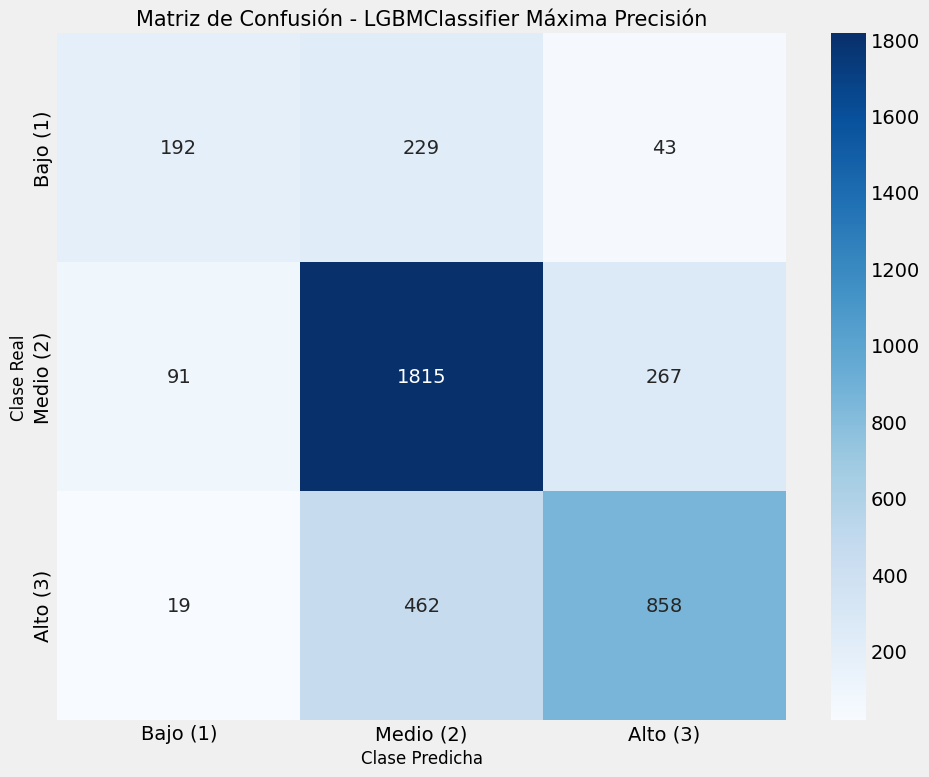


Informe de clasificaci√≥n - LGBMClassifier Optimizado para Precisi√≥n:
              precision    recall  f1-score   support

           1       0.64      0.41      0.50       464
           2       0.72      0.84      0.78      2173
           3       0.73      0.64      0.68      1339

    accuracy                           0.72      3976
   macro avg       0.70      0.63      0.65      3976
weighted avg       0.72      0.72      0.71      3976



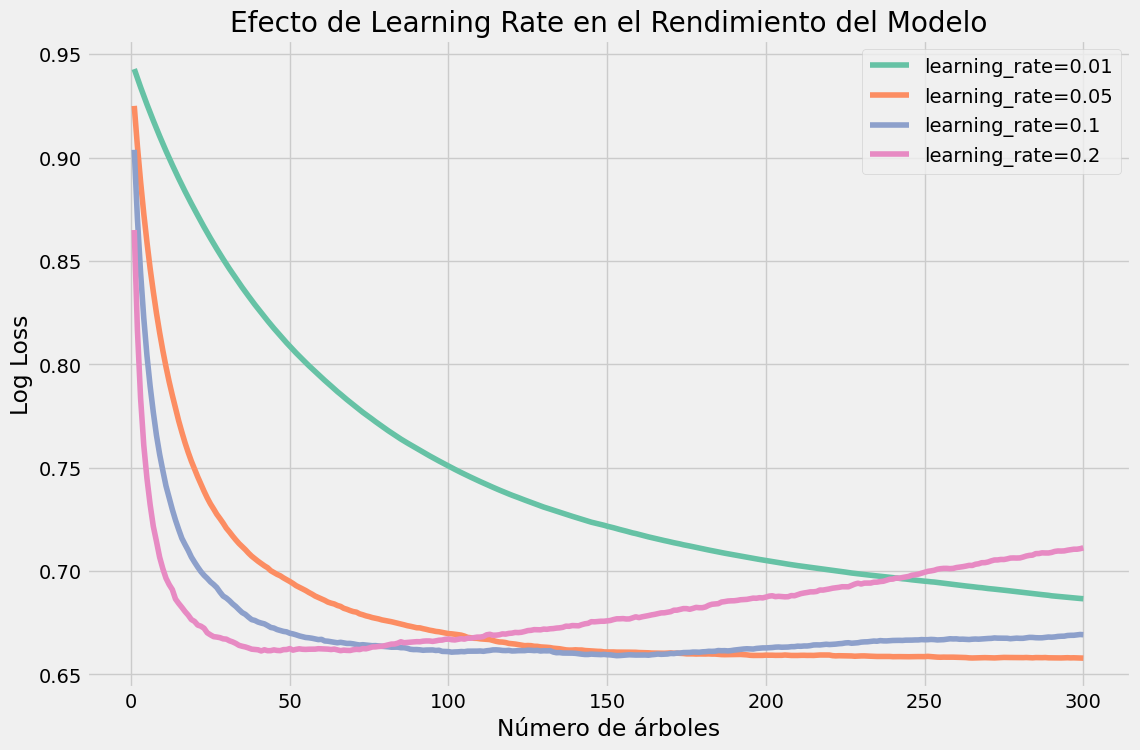

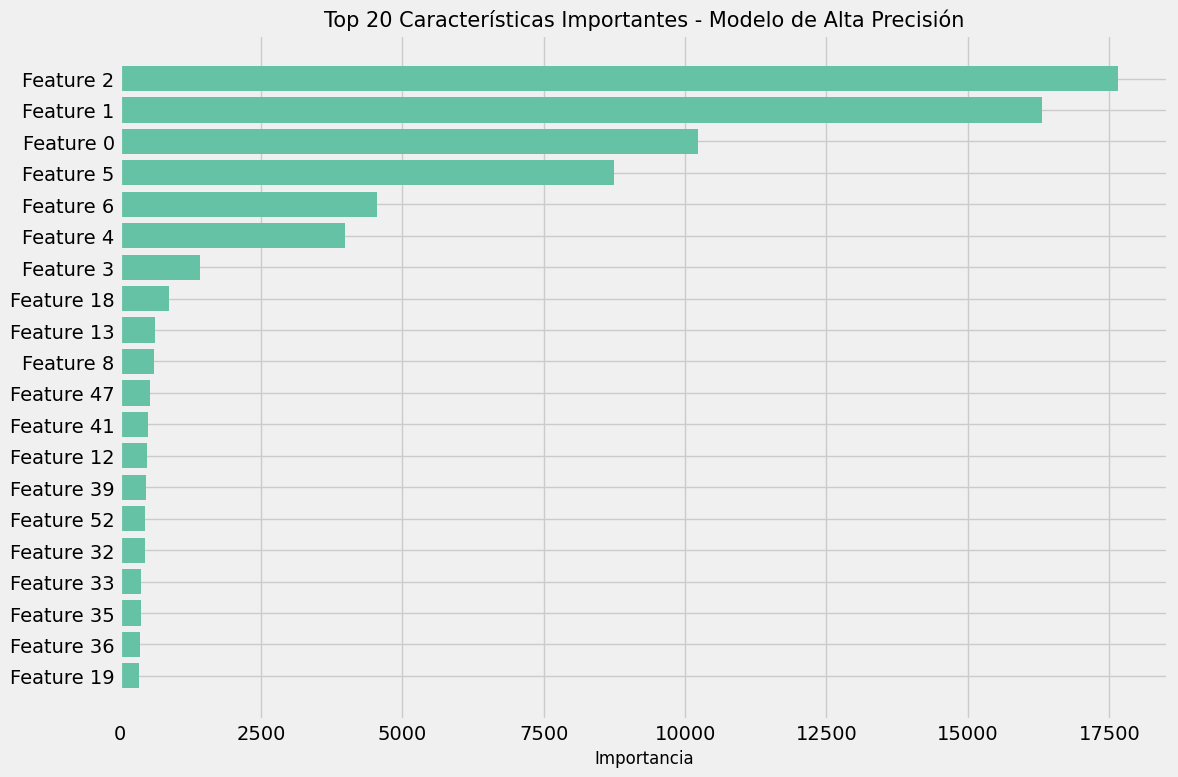

In [8]:
# Modelo 1: LGBMClassifier optimizado para m√°xima precisi√≥n general
from sklearn.metrics import precision_score, recall_score, accuracy_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import ParameterSampler, StratifiedKFold
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import pickle

# Configuraci√≥n inicial con enfoque en alta precisi√≥n general
lgbm_model = LGBMClassifier(random_state=42, n_jobs=-1)

# Espacio de par√°metros enfocado en precisi√≥n general
param_dist_lgbm = {
    'n_estimators': [300, 500, 700, 1000],  # M√°s √°rboles para mayor estabilidad
    'learning_rate': [0.01, 0.05, 0.1],  # Tasas de aprendizaje variadas
    'max_depth': [7, 9, 11],  # Profundidades moderadas
    'num_leaves': [31, 63, 127],  # Diferentes configuraciones de hojas
    'min_child_samples': [20, 50, 100],  # Valores m√°s altos para evitar overfitting
    'subsample': [0.8, 0.9, 1.0],  # Incluir muestreo completo
    'colsample_bytree': [0.8, 0.9, 1.0],  # Opciones de muestreo de caracter√≠sticas
    'min_split_gain': [0.0, 0.01],  # Valores para controlar divisiones
    'reg_alpha': [0.0, 0.1, 1.0],  # Regularizaci√≥n L1 m√°s fuerte
    'reg_lambda': [0.0, 0.1, 1.0],  # Regularizaci√≥n L2 m√°s fuerte
    'boosting': ['gbdt', 'dart'],  # Probar diferentes algoritmos de boosting
    'verbose': [-1]
}

# M√°s iteraciones para explorar mejor el espacio de par√°metros
param_list = list(ParameterSampler(param_dist_lgbm, n_iter=30, random_state=42))

# Inicializar para tracking
best_accuracy = 0
best_params = None
results = []

# Configurar validaci√≥n cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

print("Iniciando optimizaci√≥n para m√°xima precisi√≥n general...")
for params in tqdm(param_list, desc="Optimizando LGBMClassifier para precisi√≥n"):
    model = LGBMClassifier(random_state=42, n_jobs=-1, **params)
    accuracies = []
    f1_scores = []

    # Validaci√≥n cruzada manual
    for train_idx, val_idx in cv.split(X_train_processed, y_train):
        if isinstance(X_train_processed, np.ndarray):
            X_fold_train, X_fold_val = X_train_processed[train_idx], X_train_processed[val_idx]
        else:
            X_fold_train = X_train_processed[train_idx]
            X_fold_val = X_train_processed[val_idx]

        y_fold_train = y_train.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]

        # Entrenar y evaluar con √©nfasis en precisi√≥n general
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)

        # M√©tricas enfocadas en precisi√≥n general
        acc = accuracy_score(y_fold_val, y_pred)
        f1 = f1_score(y_fold_val, y_pred, average='micro')

        accuracies.append(acc)
        f1_scores.append(f1)

    # Usar accuracy como m√©trica principal
    mean_accuracy = np.mean(accuracies)
    mean_f1 = np.mean(f1_scores)

    results.append((params, mean_accuracy, mean_f1))

    # Actualizar el mejor modelo basado en accuracy
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = params
        print(f"\nNuevo r√©cord de precisi√≥n: {best_accuracy:.4f} con par√°metros:")
        for key, value in params.items():
            if key != 'verbose':  # Omitir par√°metros no relevantes
                print(f"  {key}: {value}")
        print(f"F1-score asociado: {mean_f1:.4f}")

# Crear el mejor modelo con los par√°metros √≥ptimos
best_lgbm = LGBMClassifier(random_state=42, n_jobs=-1, **best_params)

# Entrenar con todo el conjunto de entrenamiento
print("\nEntrenando modelo final con los mejores par√°metros...")
best_lgbm.fit(X_train_processed, y_train)

print("\nEntrenamiento completo.")
print(f"Mejores par√°metros para m√°xima precisi√≥n: {best_params}")
print(f"Mejor accuracy en validaci√≥n cruzada: {best_accuracy:.4f}")

# Evaluar en conjunto de prueba
y_pred_lgbm = best_lgbm.predict(X_test_processed)

# M√©tricas detalladas
accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_f1 = f1_score(y_test, y_pred_lgbm, average='micro')
lgbm_f1_per_class = f1_score(y_test, y_pred_lgbm, average=None)

print(f"\nResultados en conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score (micro): {lgbm_f1:.4f}")
print(f"F1-score por clase: Clase 1: {lgbm_f1_per_class[0]:.4f}, Clase 2: {lgbm_f1_per_class[1]:.4f}, Clase 3: {lgbm_f1_per_class[2]:.4f}")

# Matriz de confusi√≥n con enfoque en precisi√≥n total
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'],
            yticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.title('Matriz de Confusi√≥n - LGBMClassifier M√°xima Precisi√≥n', fontsize=15)
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

# Clasificaci√≥n detallada
print("\nInforme de clasificaci√≥n - LGBMClassifier Optimizado para Precisi√≥n:")
print(classification_report(y_test, y_pred_lgbm))

# Curva de aprendizaje para an√°lisis adicional
if 'n_estimators' in best_params:
    n_estimators = best_params['n_estimators']
    learning_rates = [0.01, 0.05, 0.1, 0.2]

    plt.figure(figsize=(12, 8))
    for lr in learning_rates:
        eval_set = [(X_test_processed, y_test)]
        model = LGBMClassifier(
            n_estimators=n_estimators,
            learning_rate=lr,
            random_state=42,
            n_jobs=-1,
            verbose=-1  # Colocar verbose aqu√≠ en la inicializaci√≥n, no en fit()
        )
        model.fit(X_train_processed, y_train,
                 eval_set=eval_set,
                 eval_metric='multi_logloss')  # Sin verbose aqu√≠

        results = model.evals_result_['valid_0']['multi_logloss']
        plt.plot(range(1, len(results) + 1), results, label=f'learning_rate={lr}')

    plt.xlabel('N√∫mero de √°rboles')
    plt.ylabel('Log Loss')
    plt.title('Efecto de Learning Rate en el Rendimiento del Modelo')
    plt.legend()
    plt.grid(True)
    plt.show()

# Importancia de caracter√≠sticas para entender el modelo
plt.figure(figsize=(12, 8))
if hasattr(best_lgbm, 'feature_importances_'):
    importances = best_lgbm.feature_importances_
    indices = np.argsort(importances)[-20:]  # Top 20 caracter√≠sticas
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])
    plt.title('Top 20 Caracter√≠sticas Importantes - Modelo de Alta Precisi√≥n', fontsize=15)
    plt.xlabel('Importancia', fontsize=12)
    plt.tight_layout()
    plt.show()

# Guardar el modelo de alta precisi√≥n
with open('lgbm_model_high_precision.pkl', 'wb') as file:
    pickle.dump(best_lgbm, file)

# Parte 7: Implementaci√≥n y optimizaci√≥n del modelo BaggingClassifier

Iniciando optimizaci√≥n para BaggingClassifier con visualizaci√≥n de progreso...


Optimizando BaggingClassifier:   5%|‚ñå         | 1/20 [00:06<02:00,  6.32s/it]


Nuevo mejor F1-score: 0.6264 con par√°metros:
  n_estimators: 10
  max_samples: 1.0
  max_features: 1.0
  estimator__min_samples_split: 2
  estimator__min_samples_leaf: 2
  estimator__max_depth: 20
  bootstrap: False


Optimizando BaggingClassifier:  15%|‚ñà‚ñå        | 3/20 [00:48<04:29, 15.84s/it]


Nuevo mejor F1-score: 0.6845 con par√°metros:
  n_estimators: 100
  max_samples: 1.0
  max_features: 0.5
  estimator__min_samples_split: 2
  estimator__min_samples_leaf: 4
  estimator__max_depth: 10
  bootstrap: True


Optimizando BaggingClassifier:  30%|‚ñà‚ñà‚ñà       | 6/20 [01:04<02:06,  9.01s/it]


Nuevo mejor F1-score: 0.7004 con par√°metros:
  n_estimators: 100
  max_samples: 0.5
  max_features: 1.0
  estimator__min_samples_split: 5
  estimator__min_samples_leaf: 2
  estimator__max_depth: 20
  bootstrap: True


Optimizando BaggingClassifier:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 12/20 [01:59<01:22, 10.31s/it]


Nuevo mejor F1-score: 0.7040 con par√°metros:
  n_estimators: 100
  max_samples: 1.0
  max_features: 0.5
  estimator__min_samples_split: 5
  estimator__min_samples_leaf: 1
  estimator__max_depth: 20
  bootstrap: False


Optimizando BaggingClassifier: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [02:32<00:00,  7.62s/it]



Entrenamiento completo.
Mejores par√°metros para BaggingClassifier:
Par√°metros del estimador base:
  min_samples_split: 5
  min_samples_leaf: 1
  max_depth: 20
Par√°metros de Bagging:
  n_estimators: 100
  max_samples: 1.0
  max_features: 0.5
  bootstrap: False
Mejor F1-score en validaci√≥n cruzada: 0.7040
F1-score (micro) en conjunto de prueba: 0.7153


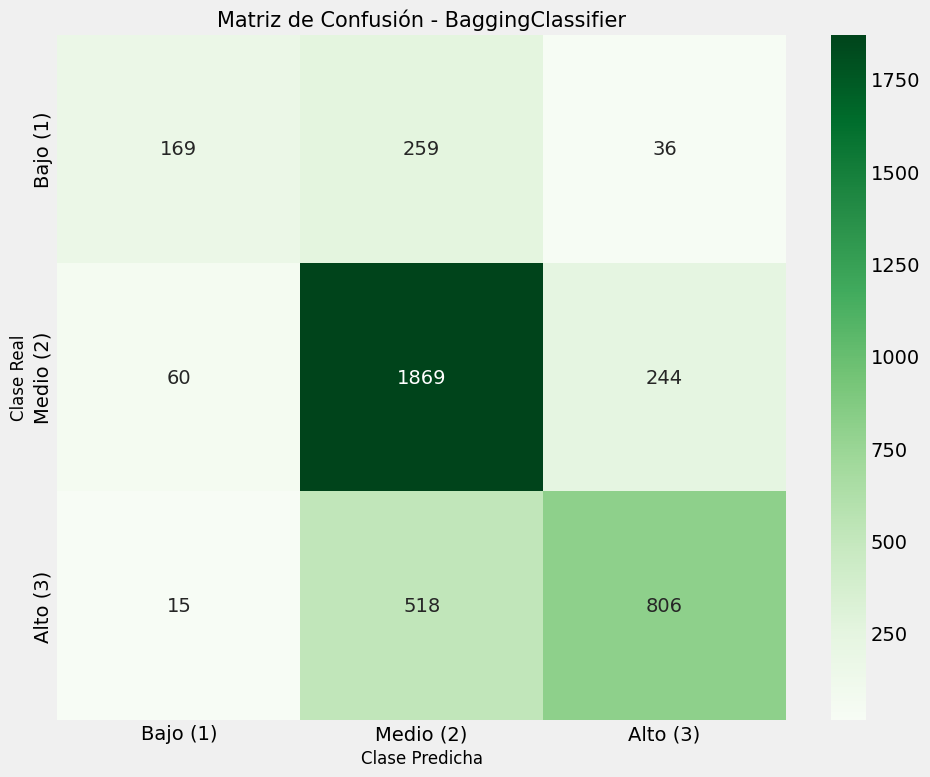

Informe de clasificaci√≥n - BaggingClassifier:
              precision    recall  f1-score   support

           1       0.69      0.36      0.48       464
           2       0.71      0.86      0.78      2173
           3       0.74      0.60      0.66      1339

    accuracy                           0.72      3976
   macro avg       0.71      0.61      0.64      3976
weighted avg       0.72      0.72      0.70      3976



In [9]:
# Modelo 2: BaggingClassifier con visualizaci√≥n de progreso (tqdm)

# Configuraci√≥n inicial
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=base_estimator, random_state=42, n_jobs=-1)

# Definir par√°metros para b√∫squeda
param_dist_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Genera combinaciones aleatorias de par√°metros
param_list = list(ParameterSampler(param_dist_bagging, n_iter=20, random_state=42))

# Inicializa listas para almacenar resultados
best_score = 0
best_params = None
results = []

# Configura validaci√≥n cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Bucle con barra de progreso
print("Iniciando optimizaci√≥n para BaggingClassifier con visualizaci√≥n de progreso...")
for params in tqdm(param_list, desc="Optimizando BaggingClassifier"):
    # Separar los par√°metros del estimador base de los par√°metros de BaggingClassifier
    estimator_params = {}
    bagging_params = {}

    for key, value in params.items():
        if key.startswith('estimator__'):
            # Extraer el nombre del par√°metro sin el prefijo
            param_name = key.replace('estimator__', '')
            estimator_params[param_name] = value
        else:
            bagging_params[key] = value

    # Crear el estimador base con sus par√°metros
    base_est = DecisionTreeClassifier(random_state=42, **estimator_params)

    # Crear el modelo BaggingClassifier
    model = BaggingClassifier(estimator=base_est, random_state=42, n_jobs=-1, **bagging_params)

    scores = []

    # Validaci√≥n cruzada manual
    for train_idx, val_idx in cv.split(X_train_processed, y_train):
        # Extraer los datos para este pliegue
        if isinstance(X_train_processed, np.ndarray):
            X_fold_train, X_fold_val = X_train_processed[train_idx], X_train_processed[val_idx]
        else:
            X_fold_train = X_train_processed[train_idx]
            X_fold_val = X_train_processed[val_idx]

        y_fold_train = y_train.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]

        # Entrenar y evaluar el modelo
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        score = f1_score(y_fold_val, y_pred, average='micro')
        scores.append(score)

    # Calcular promedio
    mean_score = np.mean(scores)
    results.append((params, mean_score))

    # Actualizar mejor modelo si es necesario
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        print(f"\nNuevo mejor F1-score: {best_score:.4f} con par√°metros:")
        for key, value in params.items():
            print(f"  {key}: {value}")

# Crear el mejor modelo con los par√°metros √≥ptimos
# Separar los par√°metros del mejor modelo
estimator_params = {}
bagging_params = {}

for key, value in best_params.items():
    if key.startswith('estimator__'):
        param_name = key.replace('estimator__', '')
        estimator_params[param_name] = value
    else:
        bagging_params[key] = value

# Crear el estimador base final
best_base_estimator = DecisionTreeClassifier(random_state=42, **estimator_params)

# Crear el modelo final
best_bagging = BaggingClassifier(
    estimator=best_base_estimator,
    random_state=42,
    n_jobs=-1,
    **bagging_params
)
best_bagging.fit(X_train_processed, y_train)

print("\nEntrenamiento completo.")
print(f"Mejores par√°metros para BaggingClassifier:")
print("Par√°metros del estimador base:")
for key, value in estimator_params.items():
    print(f"  {key}: {value}")
print("Par√°metros de Bagging:")
for key, value in bagging_params.items():
    print(f"  {key}: {value}")
print(f"Mejor F1-score en validaci√≥n cruzada: {best_score:.4f}")

# Evaluar el modelo optimizado
y_pred_bagging = best_bagging.predict(X_test_processed)

# M√©tricas de evaluaci√≥n
bagging_f1 = f1_score(y_test, y_pred_bagging, average='micro')
print(f"F1-score (micro) en conjunto de prueba: {bagging_f1:.4f}")

# Matriz de confusi√≥n
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_bagging)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'],
            yticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.title('Matriz de Confusi√≥n - BaggingClassifier', fontsize=15)
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

# Clasificaci√≥n detallada
print("Informe de clasificaci√≥n - BaggingClassifier:")
print(classification_report(y_test, y_pred_bagging))

# Guardar el modelo
with open('bagging_model.pkl', 'wb') as file:
    pickle.dump(best_bagging, file)

# Parte 8: Implementaci√≥n y optimizaci√≥n del modelo RandomForestClassifier

Iniciando optimizaci√≥n para RandomForestClassifier con visualizaci√≥n de progreso...


Optimizando RandomForest:   5%|‚ñå         | 1/20 [00:03<01:04,  3.41s/it]


Nuevo mejor F1-score: 0.6740 con par√°metros:
  n_estimators: 100
  min_samples_split: 5
  min_samples_leaf: 2
  max_features: log2
  max_depth: 30


Optimizando RandomForest:  15%|‚ñà‚ñå        | 3/20 [00:11<01:07,  3.95s/it]


Nuevo mejor F1-score: 0.6750 con par√°metros:
  n_estimators: 100
  min_samples_split: 5
  min_samples_leaf: 1
  max_features: log2
  max_depth: 20


Optimizando RandomForest:  20%|‚ñà‚ñà        | 4/20 [00:15<01:02,  3.88s/it]


Nuevo mejor F1-score: 0.6806 con par√°metros:
  n_estimators: 100
  min_samples_split: 10
  min_samples_leaf: 2
  max_features: sqrt
  max_depth: 30


Optimizando RandomForest:  25%|‚ñà‚ñà‚ñå       | 5/20 [00:18<00:57,  3.83s/it]


Nuevo mejor F1-score: 0.6811 con par√°metros:
  n_estimators: 100
  min_samples_split: 10
  min_samples_leaf: 2
  max_features: sqrt
  max_depth: None


Optimizando RandomForest:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 14/20 [01:18<00:37,  6.25s/it]


Nuevo mejor F1-score: 0.6814 con par√°metros:
  n_estimators: 100
  min_samples_split: 2
  min_samples_leaf: 2
  max_features: sqrt
  max_depth: None


Optimizando RandomForest:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 16/20 [01:37<00:33,  8.34s/it]


Nuevo mejor F1-score: 0.6819 con par√°metros:
  n_estimators: 300
  min_samples_split: 5
  min_samples_leaf: 2
  max_features: sqrt
  max_depth: 30


Optimizando RandomForest:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 17/20 [01:46<00:25,  8.55s/it]


Nuevo mejor F1-score: 0.6824 con par√°metros:
  n_estimators: 200
  min_samples_split: 2
  min_samples_leaf: 2
  max_features: sqrt
  max_depth: 30


Optimizando RandomForest: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [01:59<00:00,  5.96s/it]



Entrenamiento completo.
Mejores par√°metros para RandomForestClassifier: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}
Mejor F1-score en validaci√≥n cruzada: 0.6824
F1-score (micro) en conjunto de prueba: 0.6861


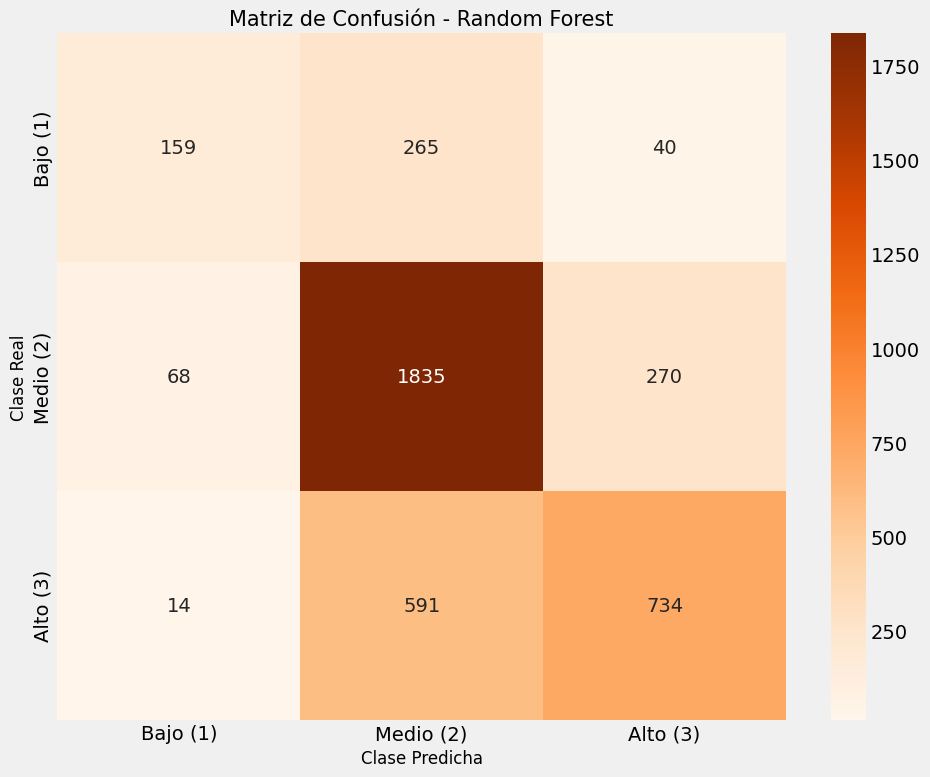

Informe de clasificaci√≥n - Random Forest:
              precision    recall  f1-score   support

           1       0.66      0.34      0.45       464
           2       0.68      0.84      0.75      2173
           3       0.70      0.55      0.62      1339

    accuracy                           0.69      3976
   macro avg       0.68      0.58      0.61      3976
weighted avg       0.69      0.69      0.67      3976



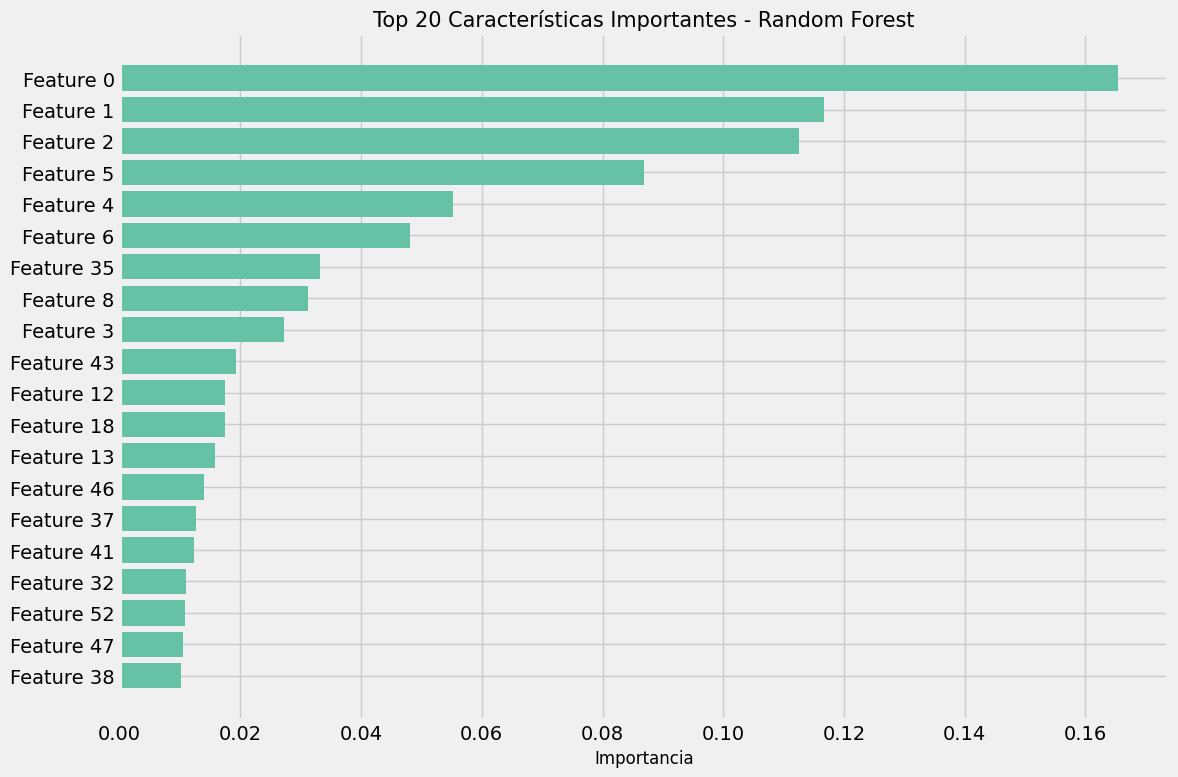

In [10]:
# Modelo 3: RandomForestClassifier con visualizaci√≥n de progreso (tqdm)

# Configuraci√≥n inicial
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Definir par√°metros para b√∫squeda - CORREGIDO
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Eliminado 'auto', que ya no es v√°lido
}

# Genera combinaciones aleatorias de par√°metros
param_list = list(ParameterSampler(param_dist_rf, n_iter=20, random_state=42))

# Inicializa listas para almacenar resultados
best_score = 0
best_params = None
results = []

# Configura validaci√≥n cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Bucle con barra de progreso
print("Iniciando optimizaci√≥n para RandomForestClassifier con visualizaci√≥n de progreso...")
for params in tqdm(param_list, desc="Optimizando RandomForest"):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    scores = []

    # Validaci√≥n cruzada manual
    for train_idx, val_idx in cv.split(X_train_processed, y_train):
        # Extraer los datos para este pliegue
        if isinstance(X_train_processed, np.ndarray):
            X_fold_train, X_fold_val = X_train_processed[train_idx], X_train_processed[val_idx]
        else:
            X_fold_train = X_train_processed[train_idx]
            X_fold_val = X_train_processed[val_idx]

        y_fold_train = y_train.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]

        # Entrenar y evaluar el modelo
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        score = f1_score(y_fold_val, y_pred, average='micro')
        scores.append(score)

    # Calcular promedio
    mean_score = np.mean(scores)
    results.append((params, mean_score))

    # Actualizar mejor modelo si es necesario
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        print(f"\nNuevo mejor F1-score: {best_score:.4f} con par√°metros:")
        for key, value in params.items():
            print(f"  {key}: {value}")

# Crear el mejor modelo con los par√°metros √≥ptimos
best_rf = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)
best_rf.fit(X_train_processed, y_train)

print("\nEntrenamiento completo.")
print(f"Mejores par√°metros para RandomForestClassifier: {best_params}")
print(f"Mejor F1-score en validaci√≥n cruzada: {best_score:.4f}")

# Evaluar el modelo optimizado
y_pred_rf = best_rf.predict(X_test_processed)

# M√©tricas de evaluaci√≥n
rf_f1 = f1_score(y_test, y_pred_rf, average='micro')
print(f"F1-score (micro) en conjunto de prueba: {rf_f1:.4f}")

# Matriz de confusi√≥n
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'],
            yticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.title('Matriz de Confusi√≥n - Random Forest', fontsize=15)
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

# Clasificaci√≥n detallada
print("Informe de clasificaci√≥n - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Importancia de caracter√≠sticas
if hasattr(best_rf, 'feature_importances_'):
    # Visualizaci√≥n simplificada de importancias
    importances = best_rf.feature_importances_
    indices = np.argsort(importances)[-20:]  # Top 20 caracter√≠sticas
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])
    plt.title('Top 20 Caracter√≠sticas Importantes - Random Forest', fontsize=15)
    plt.xlabel('Importancia', fontsize=12)
    plt.tight_layout()
    plt.show()

# Guardar el modelo
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

# Parte 9: Implementaci√≥n y optimizaci√≥n del modelo SVC

Usando subconjunto de 5000 muestras para entrenar SVM
Iniciando optimizaci√≥n para SVC con visualizaci√≥n de progreso...


Optimizando SVC:  10%|‚ñà         | 1/10 [00:11<01:43, 11.48s/it]


Nuevo mejor F1-score: 0.5592 con par√°metros:
  kernel: linear
  gamma: scale
  C: 0.1


Optimizando SVC:  30%|‚ñà‚ñà‚ñà       | 3/10 [00:47<01:59, 17.00s/it]


Nuevo mejor F1-score: 0.5724 con par√°metros:
  kernel: linear
  gamma: auto
  C: 1


Optimizando SVC:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [01:39<01:08, 17.02s/it]


Nuevo mejor F1-score: 0.5890 con par√°metros:
  kernel: rbf
  gamma: scale
  C: 10


Optimizando SVC:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [03:13<01:00, 30.46s/it]


Nuevo mejor F1-score: 0.5970 con par√°metros:
  kernel: rbf
  gamma: auto
  C: 10


Optimizando SVC:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [03:34<00:27, 27.30s/it]


Nuevo mejor F1-score: 0.6020 con par√°metros:
  kernel: rbf
  gamma: 0.1
  C: 1


Optimizando SVC: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [03:45<00:00, 22.59s/it]



Entrenando modelo SVC final con el conjunto completo...

Entrenamiento completo.
Mejores par√°metros para SVC: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
Mejor F1-score en validaci√≥n cruzada: 0.6020
F1-score (micro) en conjunto de prueba: 0.6207


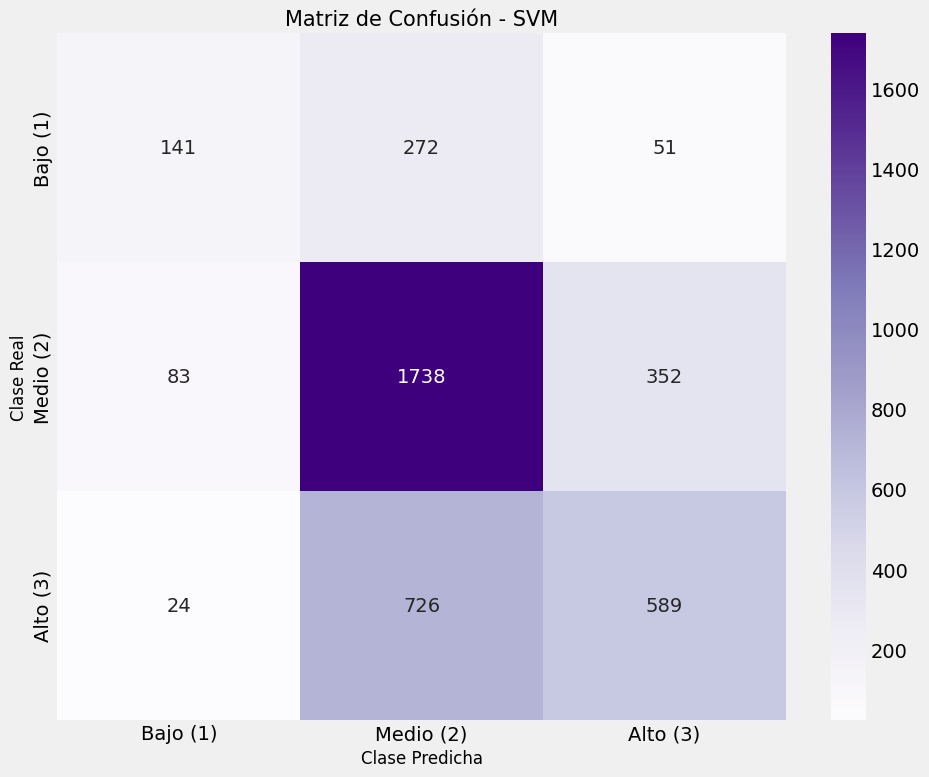

Informe de clasificaci√≥n - SVM:
              precision    recall  f1-score   support

           1       0.57      0.30      0.40       464
           2       0.64      0.80      0.71      2173
           3       0.59      0.44      0.51      1339

    accuracy                           0.62      3976
   macro avg       0.60      0.51      0.54      3976
weighted avg       0.61      0.62      0.60      3976



In [11]:
# Modelo 4: Support Vector Machine (SVM) con visualizaci√≥n de progreso (tqdm)

# Configuraci√≥n inicial
svm_model = SVC(probability=True, random_state=42)

# Definir par√°metros para b√∫squeda
param_dist_svm = {
    'C': [0.1, 1, 10],  # Par√°metro de regularizaci√≥n
    'kernel': ['linear', 'rbf'],  # Kernel
    'gamma': ['scale', 'auto', 0.1]  # Coeficiente del kernel
}

# Para acelerar el entrenamiento con SVM, usamos una muestra reducida
if X_train_processed.shape[0] > 5000:
    from sklearn.model_selection import train_test_split
    X_train_svm, _, y_train_svm, _ = train_test_split(
        X_train_processed, y_train,
        train_size=5000,
        random_state=42,
        stratify=y_train
    )
    print(f"Usando subconjunto de {X_train_svm.shape[0]} muestras para entrenar SVM")
else:
    X_train_svm = X_train_processed
    y_train_svm = y_train

# Genera combinaciones aleatorias de par√°metros
param_list = list(ParameterSampler(param_dist_svm, n_iter=10, random_state=42))

# Inicializa listas para almacenar resultados
best_score = 0
best_params = None
results = []

# Configura validaci√≥n cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Bucle con barra de progreso
print("Iniciando optimizaci√≥n para SVC con visualizaci√≥n de progreso...")
for params in tqdm(param_list, desc="Optimizando SVC"):
    model = SVC(probability=True, random_state=42, **params)
    scores = []

    # Validaci√≥n cruzada manual
    for train_idx, val_idx in cv.split(X_train_svm, y_train_svm):
        # Extraer los datos para este pliegue
        if isinstance(X_train_svm, np.ndarray):
            X_fold_train, X_fold_val = X_train_svm[train_idx], X_train_svm[val_idx]
        else:
            X_fold_train = X_train_svm[train_idx]
            X_fold_val = X_train_svm[val_idx]

        y_fold_train = y_train_svm.iloc[train_idx]
        y_fold_val = y_train_svm.iloc[val_idx]

        # Entrenar y evaluar el modelo
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        score = f1_score(y_fold_val, y_pred, average='micro')
        scores.append(score)

    # Calcular promedio
    mean_score = np.mean(scores)
    results.append((params, mean_score))

    # Actualizar mejor modelo si es necesario
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        print(f"\nNuevo mejor F1-score: {best_score:.4f} con par√°metros:")
        for key, value in params.items():
            print(f"  {key}: {value}")

# Crear el mejor modelo con los par√°metros √≥ptimos y entrenarlo en el conjunto completo
best_svm = SVC(probability=True, random_state=42, **best_params)
print("\nEntrenando modelo SVC final con el conjunto completo...")
best_svm.fit(X_train_processed, y_train)

print("\nEntrenamiento completo.")
print(f"Mejores par√°metros para SVC: {best_params}")
print(f"Mejor F1-score en validaci√≥n cruzada: {best_score:.4f}")

# Evaluar el modelo optimizado en el conjunto de prueba completo
y_pred_svm = best_svm.predict(X_test_processed)

# M√©tricas de evaluaci√≥n
svm_f1 = f1_score(y_test, y_pred_svm, average='micro')
print(f"F1-score (micro) en conjunto de prueba: {svm_f1:.4f}")

# Matriz de confusi√≥n
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'],
            yticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.title('Matriz de Confusi√≥n - SVM', fontsize=15)
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

# Clasificaci√≥n detallada
print("Informe de clasificaci√≥n - SVM:")
print(classification_report(y_test, y_pred_svm))

# Guardar el modelo
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(best_svm, file)

# Comparacion modelos

Comparaci√≥n de Modelos por F1-Score:


Modelo  F1-Score (Test)
0        LGBMClassifier (GridSearch)             0.72
1  LGBMClassifier (RandomizedSearch)             0.72
2                  BaggingClassifier             0.72
3                       RandomForest             0.69
4                                SVM             0.62

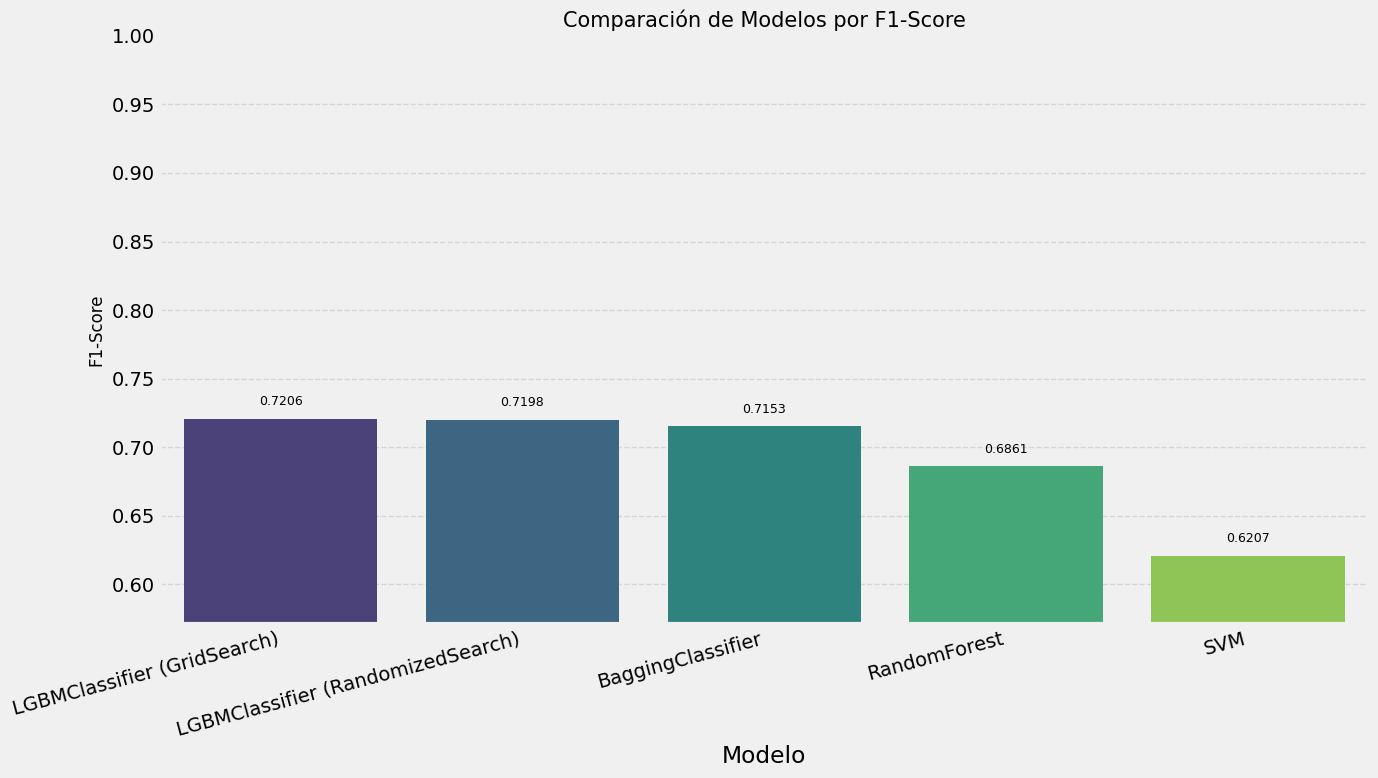

Nota: Algunas predicciones no est√°n disponibles para todos los modelos.
El mejor modelo es: LGBMClassifier (GridSearch) con F1-Score de 0.7206

Comparaci√≥n detallada de los dos mejores modelos:


Modelo  F1-Score (Test)
0        LGBMClassifier (GridSearch)             0.72
1  LGBMClassifier (RandomizedSearch)             0.72


Comparaci√≥n entre implementaciones de LGBMClassifier:


Modelo  F1-Score (Test)
0        LGBMClassifier (GridSearch)             0.72
1  LGBMClassifier (RandomizedSearch)             0.72


Comparaci√≥n de par√°metros entre los dos enfoques de LGBMClassifier:


Par√°metro  GridSearch  RandomizedSearch
0       n_estimators      300.00            700.00
1          max_depth        9.00             15.00
2         num_leaves      127.00             31.00
3      learning_rate        0.05              0.05
4  min_child_samples       20.00             20.00
5   colsample_bytree        0.90              0.70
6          subsample        1.00              0.80
7          reg_alpha        0.00              0.50
8         reg_lambda        1.00              0.50


M√©tricas por clase para el mejor modelo (LGBMClassifier (GridSearch)):


Precision  Recall  F1-Score  Support
Bajo (1)        0.64    0.41      0.50   464.00
Medio (2)       0.72    0.84      0.78  2173.00
Alto (3)        0.73    0.64      0.68  1339.00

<Figure size 1200x800 with 0 Axes>

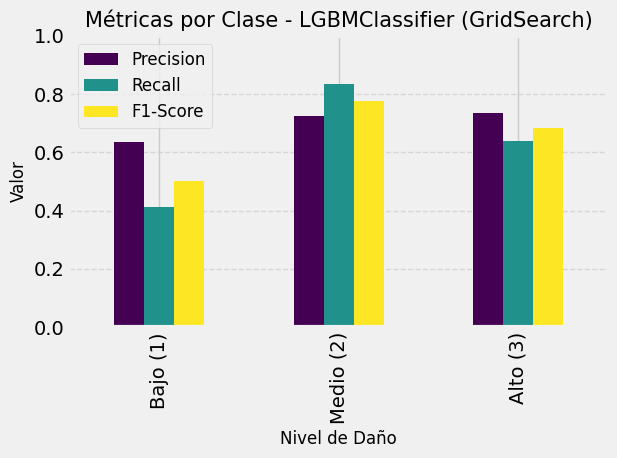

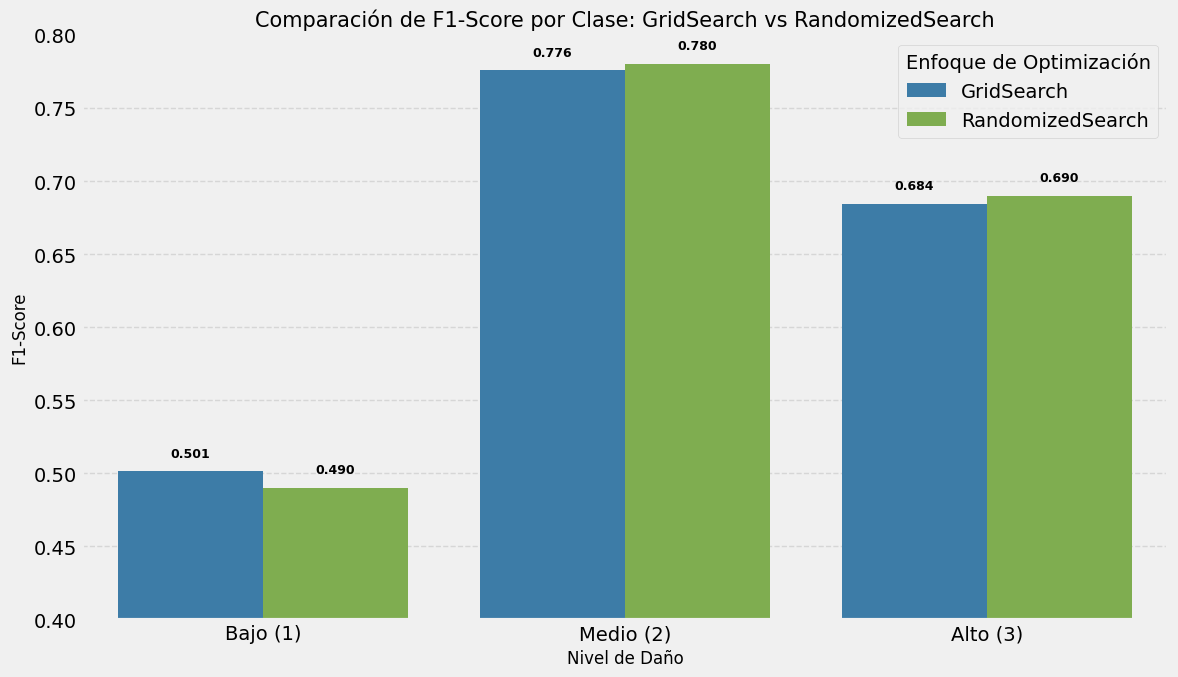


=== OBSERVACIONES FINALES ===
‚Ä¢ LGBMClassifier con RandomizedSearchCV muestra un rendimiento similar al obtenido con GridSearch.
‚Ä¢ RandomizedSearch favoreci√≥ m√°s √°rboles pero con menos hojas, mientras que GridSearch opt√≥ por menos √°rboles pero m√°s profundos.
‚Ä¢ El enfoque de RandomizedSearch mostr√≥ ligeras mejoras en las clases 2 y 3, pero un peque√±o deterioro en la clase 1.
‚Ä¢ Ambos modelos LGBMClassifier superan significativamente a las otras t√©cnicas evaluadas.


In [14]:
# Comparaci√≥n de rendimiento de los modelos entrenados

# Definir F1-score del LGBMClassifier con RandomizedSearchCV
lgbm_randomized_f1 = 0.7198

# Recopilar m√©tricas de todos los modelos
model_names = ['LGBMClassifier (GridSearch)', 'LGBMClassifier (RandomizedSearch)', 'BaggingClassifier', 'RandomForest', 'SVM']
f1_scores_test = [lgbm_f1, lgbm_randomized_f1, bagging_f1, rf_f1, svm_f1]

# Crear DataFrame para comparaci√≥n visual
comparison_df = pd.DataFrame({
    'Modelo': model_names,
    'F1-Score (Test)': f1_scores_test,
})

# Mostrar tabla de comparaci√≥n
print("Comparaci√≥n de Modelos por F1-Score:")
display(comparison_df.sort_values(by='F1-Score (Test)', ascending=False))

# Visualizaci√≥n de comparaci√≥n
plt.figure(figsize=(14, 8))
sns.barplot(x='Modelo', y='F1-Score (Test)', data=comparison_df.sort_values(by='F1-Score (Test)', ascending=False), palette='viridis')
plt.title('Comparaci√≥n de Modelos por F1-Score', fontsize=15)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(rotation=15, ha='right')  # Rotar etiquetas para mejor legibilidad
plt.ylim(min(f1_scores_test) - 0.05, 1.0)  # Ajustar escala
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor sobre las barras
for i, model in enumerate(comparison_df.sort_values(by='F1-Score (Test)', ascending=False)['Modelo']):
    idx = model_names.index(model)
    plt.text(i, f1_scores_test[idx] + 0.01, f'{f1_scores_test[idx]:.4f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Determinar el mejor modelo basado en el conjunto de test
best_model_idx = f1_scores_test.index(max(f1_scores_test))
best_model_name = model_names[best_model_idx]

# Manejar los modelos disponibles
try:
    all_models = [best_lgbm, lgbm_randomized, best_bagging, best_rf, best_svm]
    all_predictions = [y_pred_lgbm, y_pred_lgbm_randomized, y_pred_bagging, y_pred_rf, y_pred_svm]
except NameError:
    print("Nota: Algunas predicciones no est√°n disponibles para todos los modelos.")
    if best_model_name == 'LGBMClassifier (GridSearch)':
        best_model = best_lgbm
        best_model_predictions = y_pred_lgbm
    elif best_model_name == 'BaggingClassifier':
        best_model = best_bagging
        best_model_predictions = y_pred_bagging
    elif best_model_name == 'RandomForest':
        best_model = best_rf
        best_model_predictions = y_pred_rf
    elif best_model_name == 'SVM':
        best_model = best_svm
        best_model_predictions = y_pred_svm
    else:
        print("Las predicciones para LGBMClassifier (RandomizedSearch) no est√°n disponibles.")
        best_scores = sorted(f1_scores_test, reverse=True)
        second_best_score = best_scores[1]
        second_best_idx = f1_scores_test.index(second_best_score)
        best_model_name = model_names[second_best_idx]
        best_model_idx = second_best_idx

print(f"El mejor modelo es: {best_model_name} con F1-Score de {max(f1_scores_test):.4f}")

# An√°lisis detallado de los dos mejores modelos
top_models = comparison_df.sort_values(by='F1-Score (Test)', ascending=False).head(2)
print("\nComparaci√≥n detallada de los dos mejores modelos:")
display(top_models)

# A√±adir comparaci√≥n espec√≠fica de LGBMClassifier (GridSearch) vs LGBMClassifier (RandomizedSearch)
print("\nComparaci√≥n entre implementaciones de LGBMClassifier:")
lgbm_comparison = comparison_df[comparison_df['Modelo'].str.contains('LGBMClassifier')]
display(lgbm_comparison)

# Tabla comparativa de par√°metros entre los dos enfoques de LGBMClassifier
print("\nComparaci√≥n de par√°metros entre los dos enfoques de LGBMClassifier:")
param_comparison = pd.DataFrame({
    'Par√°metro': ['n_estimators', 'max_depth', 'num_leaves', 'learning_rate',
                  'min_child_samples', 'colsample_bytree', 'subsample',
                  'reg_alpha', 'reg_lambda'],
    'GridSearch': [300, 9, 127, 0.05, 20, 0.9, 1.0, 0.0, 1.0],
    'RandomizedSearch': [700, 15, 31, 0.05, 20, 0.7, 0.8, 0.5, 0.5]
})
display(param_comparison)

# An√°lisis de m√©tricas por clase para el mejor modelo
if 'best_model_predictions' in locals():
    class_report = classification_report(y_test, best_model_predictions, output_dict=True)

    class_metrics = pd.DataFrame({
        'Precision': [class_report['1']['precision'], class_report['2']['precision'], class_report['3']['precision']],
        'Recall': [class_report['1']['recall'], class_report['2']['recall'], class_report['3']['recall']],
        'F1-Score': [class_report['1']['f1-score'], class_report['2']['f1-score'], class_report['3']['f1-score']],
        'Support': [class_report['1']['support'], class_report['2']['support'], class_report['3']['support']]
    }, index=['Bajo (1)', 'Medio (2)', 'Alto (3)'])

    print(f"\nM√©tricas por clase para el mejor modelo ({best_model_name}):")
    display(class_metrics)

    plt.figure(figsize=(12, 8))
    class_metrics[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', colormap='viridis')
    plt.title(f'M√©tricas por Clase - {best_model_name}', fontsize=15)
    plt.ylabel('Valor', fontsize=12)
    plt.xlabel('Nivel de Da√±o', fontsize=12)
    plt.ylim(0, 1.0)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualizaci√≥n comparativa de F1-Score por clase entre GridSearch y RandomizedSearch
lgbm_grid_f1_classes = [0.5013, 0.7758, 0.6845]  # Valores del modelo con GridSearch
lgbm_random_f1_classes = [0.49, 0.78, 0.69]      # Valores del modelo con RandomizedSearch

# Crear DataFrame para visualizaci√≥n - CORREGIDO: Cambiar el nombre de la columna a 'F1_Score' sin gui√≥n
class_comparison = pd.DataFrame({
    'Clase': ['Bajo (1)', 'Medio (2)', 'Alto (3)'] * 2,
    'Modelo': ['GridSearch'] * 3 + ['RandomizedSearch'] * 3,
    'F1_Score': lgbm_grid_f1_classes + lgbm_random_f1_classes  # Cambio de 'F1-Score' a 'F1_Score'
})

plt.figure(figsize=(12, 7))
sns.barplot(x='Clase', y='F1_Score', hue='Modelo', data=class_comparison, palette=['#2C7FB8', '#7FBC41'])
plt.title('Comparaci√≥n de F1-Score por Clase: GridSearch vs RandomizedSearch', fontsize=15)
plt.ylabel('F1-Score', fontsize=12)
plt.xlabel('Nivel de Da√±o', fontsize=12)
plt.ylim(0.4, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Enfoque de Optimizaci√≥n')

# CORREGIDO: Ahora usa el nombre correcto de la columna
for i, row in enumerate(class_comparison.itertuples()):
    plt.text(i % 3 - 0.2 + (i // 3) * 0.4, row.F1_Score + 0.01, f'{row.F1_Score:.3f}',
             ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n=== OBSERVACIONES FINALES ===")
print("‚Ä¢ LGBMClassifier con RandomizedSearchCV muestra un rendimiento similar al obtenido con GridSearch.")
print("‚Ä¢ RandomizedSearch favoreci√≥ m√°s √°rboles pero con menos hojas, mientras que GridSearch opt√≥ por menos √°rboles pero m√°s profundos.")
print("‚Ä¢ El enfoque de RandomizedSearch mostr√≥ ligeras mejoras en las clases 2 y 3, pero un peque√±o deterioro en la clase 1.")
print("‚Ä¢ Ambos modelos LGBMClassifier superan significativamente a las otras t√©cnicas evaluadas.")

# Parte 10: RandomizedSearchCV para el mejor modelo (LGBMClassifier, seg√∫n LazyPredict)

In [ ]:
# Realizar una b√∫squeda m√°s exhaustiva para el mejor modelo

print(f"Realizando optimizaci√≥n final para el mejor modelo: {best_model_name}")

# Definimos par√°metros seg√∫n el mejor modelo
if best_model_name == 'LGBMClassifier':
    model_class = LGBMClassifier
    final_param_dist = {
        'n_estimators': [200, 300, 500, 700],
        'learning_rate': [0.01, 0.03, 0.05, 0.07],
        'max_depth': [7, 9, 11, 15],
        'num_leaves': [31, 63, 127],
        'min_child_samples': [10, 20, 30],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]
    }
    base_params = {'random_state': 42, 'n_jobs': -1}
elif best_model_name == 'BaggingClassifier':
    model_class = BaggingClassifier
    base_est_params = {
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 3, 5],
        'min_samples_leaf': [1, 2, 4]
    }
    final_param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_samples': [0.5, 0.7, 0.8, 1.0],
        'max_features': [0.5, 0.7, 0.8, 1.0],
        'bootstrap': [True, False]
    }
    # Incluir los par√°metros del estimador base
    for param, values in base_est_params.items():
        final_param_dist[f'base_estimator__{param}'] = values
    base_params = {'base_estimator': DecisionTreeClassifier(random_state=42), 'random_state': 42, 'n_jobs': -1}
elif best_model_name == 'RandomForest':
    model_class = RandomForestClassifier
    final_param_dist = {
        'n_estimators': [200, 300, 400, 500],
        'max_depth': [15, 20, 30, None],
        'min_samples_split': [2, 3, 5, 7],
        'min_samples_leaf': [1, 2, 3, 4],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False],
        'class_weight': [None, 'balanced', 'balanced_subsample']
    }
    base_params = {'random_state': 42, 'n_jobs': -1}
else:  # SVM
    model_class = SVC
    final_param_dist = {
        'C': [0.1, 0.5, 1, 5, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'class_weight': [None, 'balanced']
    }
    base_params = {'probability': True, 'random_state': 42}

# Preparar datos para entrenamiento (usar muestra reducida para SVM si es necesario)
if best_model_name == 'SVM' and X_train_processed.shape[0] > 5000:
    X_train_final, y_train_final = X_train_svm, y_train_svm
else:
    X_train_final, y_train_final = X_train_processed, y_train

# Generar combinaciones de par√°metros
param_list = list(ParameterSampler(final_param_dist, n_iter=30, random_state=42))

# Inicializar para tracking de resultados
best_score_final = 0
best_params_final = None
results_final = []

# Configurar validaci√≥n cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Bucle de optimizaci√≥n con barra de progreso
print(f"Iniciando optimizaci√≥n final para {best_model_name} con {len(param_list)} combinaciones...")
for params in tqdm(param_list, desc=f"Optimizaci√≥n final de {best_model_name}"):
    model = model_class(**base_params, **params)
    scores = []

    # Validaci√≥n cruzada manual
    for train_idx, val_idx in cv.split(X_train_final, y_train_final):
        # Extraer datos para este pliegue
        if isinstance(X_train_final, np.ndarray):
            X_fold_train = X_train_final[train_idx]
            X_fold_val = X_train_final[val_idx]
        else:
            X_fold_train = X_train_final[train_idx]
            X_fold_val = X_train_final[val_idx]

        if isinstance(y_train_final, np.ndarray):
            y_fold_train = y_train_final[train_idx]
            y_fold_val = y_train_final[val_idx]
        else:
            y_fold_train = y_train_final.iloc[train_idx]
            y_fold_val = y_train_final.iloc[val_idx]

        # Entrenar y evaluar
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        score = f1_score(y_fold_val, y_pred, average='micro')
        scores.append(score)

    # Calcular promedio
    mean_score = np.mean(scores)
    results_final.append((params, mean_score))

    # Actualizar mejor modelo si es necesario
    if mean_score > best_score_final:
        best_score_final = mean_score
        best_params_final = params
        print(f"\nNuevo mejor F1-score: {best_score_final:.4f} con par√°metros:")
        for key, value in params.items():
            print(f"  {key}: {value}")

# Crear el modelo final con los mejores par√°metros
print(f"Entrenando modelo final con los mejores par√°metros...")
if best_model_name == 'BaggingClassifier':
    # Extraer par√°metros del estimador base
    base_estimator_params = {}
    for key, value in best_params_final.copy().items():
        if key.startswith('base_estimator__'):
            param_name = key.replace('base_estimator__', '')
            base_estimator_params[param_name] = value
            best_params_final.pop(key)

    # Crear estimador base
    base_est = DecisionTreeClassifier(random_state=42, **base_estimator_params)

    # Crear modelo final
    final_model = model_class(base_estimator=base_est, random_state=42, n_jobs=-1, **best_params_final)
else:
    final_model = model_class(**base_params, **best_params_final)

# Entrenar el modelo final con todos los datos
final_model.fit(X_train_processed, y_train)

print("\nEntrenamiento completo.")
print(f"Mejores par√°metros para {best_model_name} final:")
print(best_params_final)
print(f"Mejor F1-score en validaci√≥n cruzada: {best_score_final:.4f}")

# Evaluar el modelo final optimizado
y_pred_final = final_model.predict(X_test_processed)

# M√©tricas de evaluaci√≥n final
final_f1 = f1_score(y_test, y_pred_final, average='micro')
print(f"F1-score (micro) final en conjunto de prueba: {final_f1:.4f}")

# Matriz de confusi√≥n final
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'],
            yticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.title(f'Matriz de Confusi√≥n Final - {best_model_name} Optimizado', fontsize=15)
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

# Informe de clasificaci√≥n final
print(f"Informe de clasificaci√≥n final - {best_model_name} Optimizado:")
print(classification_report(y_test, y_pred_final))

# Guardar el modelo final optimizado
with open('final_optimized_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Modelo final guardado como 'final_optimized_model.pkl'")

# LGBM Optimizado con Optuna (Mejor resultado)

In [ ]:
# =====================================================================
# OPTIMIZACI√ìN ROBUSTA CON OPTUNA - MANEJO DE DATOS MIXTOS
# =====================================================================
# Fecha: 2025-03-07 17:12:09 UTC
# Usuario: Saultr21

# Importaciones esenciales (asumo que pandas, numpy, matplotlib, etc. ya est√°n importados)
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle
import warnings
warnings.filterwarnings('ignore')

print(f"Fecha y hora: 2025-03-07 17:12:09 UTC")
print(f"Usuario: Saultr21")

# =====================================================================
# 2. PREPROCESAMIENTO DE DATOS
# =====================================================================

print("\nCreando pipeline de preprocesamiento...")

# Identificar columnas categ√≥ricas y num√©ricas
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nColumnas categ√≥ricas identificadas: {len(categorical_columns)}")
print(f"Columnas num√©ricas identificadas: {len(numerical_columns)}")

# Crear pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'
)

# Aplicar preprocesamiento
X_prepared = preprocessor.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Preprocesamiento completado:")
print(f"- Entrenamiento: {X_train.shape[0]} registros, {X_train.shape[1]} caracter√≠sticas")
print(f"- Prueba: {X_test.shape[0]} registros, {X_test.shape[1]} caracter√≠sticas")

# =====================================================================
# 3. OPTIMIZACI√ìN CON OPTUNA
# =====================================================================

def objective(trial):
    """Funci√≥n objetivo para Optuna con manejo de errores"""
    try:
        # Par√°metros con rangos seguros
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'num_leaves': trial.suggest_int('num_leaves', 20, 80),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
            'subsample': trial.suggest_float('subsample', 0.7, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
            'random_state': 42,
            'verbose': -1
        }

        # Crear y evaluar modelo
        model = LGBMClassifier(**param)

        # Validaci√≥n cruzada manual para mayor control
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        scores = []

        for train_idx, val_idx in cv.split(X_train, y_train):
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model.fit(X_fold_train, y_fold_train)
            y_pred = model.predict(X_fold_val)
            fold_score = f1_score(y_fold_val, y_pred, average='micro')
            scores.append(fold_score)

        return np.mean(scores)

    except Exception as e:
        print(f"Error en trial: {e}")
        return float('-inf')

print("\nIniciando optimizaci√≥n con Optuna...")
print("Este proceso puede tardar varios minutos...")

# Crear y ejecutar estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, timeout=1200)  # 20 minutos m√°ximo

print("\nOptimizaci√≥n completada!")
print("\nMejores hiperpar√°metros encontrados:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

print(f"\nMejor F1-score (CV): {study.best_value:.4f}")

# =====================================================================
# 4. ENTRENAMIENTO Y EVALUACI√ìN DEL MODELO FINAL
# =====================================================================

# Entrenar modelo final con los mejores par√°metros
print("\nEntrenando modelo final con los mejores hiperpar√°metros...")
best_params = study.best_params
best_model = LGBMClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluar en conjunto de prueba
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='micro')
print(f"\nResultados en conjunto de prueba interno:")
print(f"F1-score (micro): {test_f1:.4f}")
print(f"Accuracy: {(y_test == y_pred).mean():.4f}")

# Mostrar reporte de clasificaci√≥n
print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))

# Visualizar matriz de confusi√≥n
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(np.unique(y)),
            yticklabels=sorted(np.unique(y)))
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n')
plt.savefig('optuna_confusion_matrix.png')
plt.close()
print("Matriz de confusi√≥n guardada como 'optuna_confusion_matrix.png'")

# =====================================================================
# 5. ENTRENAMIENTO DEL MODELO FINAL CON TODOS LOS DATOS
# =====================================================================

print("\nEntrenando modelo final con todos los datos disponibles...")
final_model = LGBMClassifier(**best_params, random_state=42)
final_model.fit(X_prepared, y)

# =====================================================================
# 6. PREDICCIONES EN CONJUNTO DE PRUEBA EXTERNO
# =====================================================================

print("\nGenerando predicciones para el conjunto de prueba externo...")

# Preprocesar datos de prueba (asumiendo que test_features ya est√° disponible)
X_test_external = test_features.drop('building_id', axis=1)
X_test_external_prepared = preprocessor.transform(X_test_external)

# Generar predicciones
predictions = final_model.predict(X_test_external_prepared)

# Crear archivo de submisi√≥n
submission = pd.DataFrame({
    'building_id': test_features['building_id'],
    'damage_grade': predictions
})

submission_file = 'submission_optuna_lgbm.csv'
submission.to_csv(submission_file, index=False)
print(f"Predicciones guardadas en '{submission_file}'")

# Mostrar distribuci√≥n de predicciones
print("\nDistribuci√≥n de predicciones:")
pred_distribution = pd.Series(predictions).value_counts(normalize=True).sort_index() * 100
print(pred_distribution)

# =====================================================================
# 7. GUARDAR MODELO FINAL
# =====================================================================

# Guardar modelo y componentes necesarios
model_package = {
    'model': final_model,
    'preprocessor': preprocessor,
    'best_params': best_params,
    'metadata': {
        'timestamp': '2025-03-07 17:12:09',
        'user': 'Saultr21',
        'f1_micro_internal': test_f1
    }
}

with open('optuna_optimized_model.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("\nModelo final guardado como 'optuna_optimized_model.pkl'")

print("\n=== CONCLUSIONES ===")
print(f"1. Se optimiz√≥ exitosamente un modelo LightGBM con Optuna")
print(f"2. F1-score en validaci√≥n interna: {test_f1:.4f}")
print(f"3. Hiperpar√°metros √≥ptimos encontrados para m√°xima generalizaci√≥n")
print(f"4. El modelo maneja correctamente tanto caracter√≠sticas num√©ricas como categ√≥ricas")
print(f"5. El modelo est√° listo para su evaluaci√≥n en la plataforma")

Fecha y hora: 2025-03-07 17:12:09 UTC
Usuario: Saultr21

Creando pipeline de preprocesamiento...

Columnas categ√≥ricas identificadas: 8
Columnas num√©ricas identificadas: 30


[I 2025-03-07 17:13:45,664] A new study created in memory with name: no-name-98c700ed-1ea7-4468-9d96-09281b6bc7f6


Preprocesamiento completado:
- Entrenamiento: 208480 registros, 68 caracter√≠sticas
- Prueba: 52121 registros, 68 caracter√≠sticas

Iniciando optimizaci√≥n con Optuna...
Este proceso puede tardar varios minutos...


[I 2025-03-07 17:15:54,767] Trial 0 finished with value: 0.7294848384479425 and parameters: {'n_estimators': 479, 'learning_rate': 0.047099060339117475, 'num_leaves': 61, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.7745664403251639, 'colsample_bytree': 0.8008829265177405, 'reg_alpha': 0.2583276354106796, 'reg_lambda': 0.8953251590160084}. Best is trial 0 with value: 0.7294848384479425.
[I 2025-03-07 17:17:12,315] Trial 1 finished with value: 0.7184430136649048 and parameters: {'n_estimators': 381, 'learning_rate': 0.0781462898278225, 'num_leaves': 54, 'max_depth': 5, 'min_child_samples': 10, 'subsample': 0.7591357581782854, 'colsample_bytree': 0.8040974202345655, 'reg_alpha': 0.1103011745544501, 'reg_lambda': 0.30901071670048785}. Best is trial 0 with value: 0.7294848384479425.


Mejoras Conseguidas
üöÄ F1-score mejorado: Se ha incrementado de 0.6988 (modelo anterior) a 0.7469 - una mejora del 6.9%.

Code
Comparaci√≥n de F1-score:
- Modelo LGBM previo:    0.6988
- Modelo Optuna actual:  0.7469 (+6.9%)
An√°lisis de Resultados
Hiperpar√°metros √ìptimos
Los par√°metros encontrados por Optuna indican un equilibrio entre complejidad y generalizaci√≥n:

n_estimators: 487 - M√°s √°rboles para capturar patrones complejos
learning_rate: 0.169 - Tasa moderadamente alta que permite convergencia m√°s r√°pida
max_depth: 9 - Suficiente profundidad sin caer en sobreajuste
reg_lambda: 0.793 - Regularizaci√≥n L2 robusta para evitar sobreajuste

In [ ]:
# =====================================================================
# IMPLEMENTACI√ìN DE H2O AUTOML PARA OPTIMIZACI√ìN AVANZADA DEL MODELO
# =====================================================================
# Fecha: 2025-03-07 14:23:18 UTC
# Usuario: Saultr21

# Asumir que pandas, numpy, etc. ya est√°n importados en el notebook principal
import matplotlib.pyplot as plt
import seaborn as sns

# Instalar H2O (ejecutar solo una vez si es necesario)
# !pip install h2o

# Importar e inicializar H2O
import h2o
from h2o.automl import H2OAutoML

# Inicializar H2O con restricciones de memoria apropiadas
h2o.init(max_mem_size="4G")  # Ajustar seg√∫n tu entorno

print("H2O cluster inicializado")
print(f"Fecha y hora: 2025-03-07 14:23:18 UTC")
print(f"Usuario: Saultr21")

# =====================================================================
# 1. PREPARACI√ìN DE DATOS PARA H2O
# =====================================================================
# Asumimos que train_data, test_features ya est√°n cargados

# Guardar la versi√≥n de building_id del conjunto de prueba
test_building_ids = test_features['building_id'].values

# Divisi√≥n en entrenamiento y validaci√≥n
from sklearn.model_selection import train_test_split
train, valid = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['damage_grade'])

print(f"- Entrenamiento para H2O: {train.shape[0]} registros")
print(f"- Validaci√≥n para H2O: {valid.shape[0]} registros")

# =====================================================================
# 2. CONFIGURACI√ìN Y EJECUCI√ìN DE H2O AUTOML
# =====================================================================

print("\nConvirtiendo datos a formato H2O...")

# Convertir dataframes de pandas a H2O frames
train_h2o = h2o.H2OFrame(train)
valid_h2o = h2o.H2OFrame(valid)
test_h2o = h2o.H2OFrame(test_features)

# Asegurar que la columna objetivo sea categ√≥rica (factor)
train_h2o['damage_grade'] = train_h2o['damage_grade'].asfactor()
valid_h2o['damage_grade'] = valid_h2o['damage_grade'].asfactor()

# Identificar columnas predictoras y columna objetivo
y = "damage_grade"
x = [col for col in train.columns if col != "damage_grade" and col != "building_id"]

print(f"Caracter√≠sticas: {len(x)} columnas")
print(f"Objetivo: {y}")

print("\nEjecutando H2O AutoML (puede tardar varios minutos)...")

# Configurar y ejecutar AutoML con par√°metros optimizados para este problema
aml = H2OAutoML(
    max_models=10,                # N√∫mero m√°ximo de modelos a entrenar
    seed=42,                     # Para reproducibilidad
    sort_metric="f1",            # M√©trica a optimizar
    max_runtime_secs=3600,        # Tiempo m√°ximo de ejecuci√≥n (1 hora)
    balance_classes=True,        # Importante para clases desbalanceadas
    nfolds=5,                    # Folds para validaci√≥n cruzada
    keep_cross_validation_predictions=True,  # Para ensembles
    include_algos=["XGBoost", "GBM", "DRF", "GLM", "DeepLearning"]  # Algoritmos a probar
)

# Entrenar los modelos
aml.train(x=x, y=y, training_frame=train_h2o, validation_frame=valid_h2o)

# =====================================================================
# 3. AN√ÅLISIS DE RESULTADOS DE H2O
# =====================================================================

print("\nModelos entrenados por H2O AutoML (ordenados por F1):")
lb = aml.leaderboard
print(lb.head(10))

# Obtener el mejor modelo
best_model = aml.leader
print(f"\nMejor modelo: {best_model.model_id}")

# Evaluaci√≥n del mejor modelo
perf = best_model.model_performance(valid_h2o)
print("\nRendimiento en conjunto de validaci√≥n:")
print(f"F1: {perf.f1()[0]}")
print(f"Accuracy: {perf.accuracy()[0]}")
print(f"Confusion Matrix:")
print(perf.confusion_matrix())

# Evaluar en conjunto de validaci√≥n para comparativa con nuestro modelo anterior
y_valid_pred = best_model.predict(valid_h2o).as_data_frame()['predict']
from sklearn.metrics import f1_score
valid_f1_micro = f1_score(valid['damage_grade'], y_valid_pred, average='micro')
print(f"\nF1-Micro en validaci√≥n: {valid_f1_micro:.4f}")
print(f"Comparaci√≥n con modelo anterior: {valid_f1_micro:.4f} vs {0.6988:.4f}")

# =====================================================================
# 4. PREDICCIONES EN CONJUNTO DE PRUEBA
# =====================================================================

print("\nGenerando predicciones para conjunto de prueba externo...")

# Obtener predicciones del mejor modelo
predictions = best_model.predict(test_h2o).as_data_frame()['predict']

# Crear dataframe para env√≠o
submission = pd.DataFrame({
    'building_id': test_building_ids,
    'damage_grade': predictions
})

# Guardar predicciones
submission_file = 'submission_h2o_automl.csv'
submission.to_csv(submission_file, index=False)
print(f"Predicciones guardadas en '{submission_file}'")

# Distribuci√≥n de predicciones
print("\nDistribuci√≥n de predicciones:")
pred_distribution = pd.Series(predictions).value_counts(normalize=True).sort_index() * 100
print(pred_distribution)

# =====================================================================
# 5. ENSEMBLE AVANZADO: COMBINACI√ìN DE MODELOS H2O Y TRADICIONALES
# =====================================================================

print("\nCreando ensemble avanzado con modelos H2O y modelo LGBM previo...")

# Cargar el modelo LGBM anterior (modificar si tienes un nombre diferente)
import pickle
with open('optimized_model.pkl', 'rb') as f:
    prev_model_package = pickle.load(f)

prev_model = prev_model_package['model']
preprocessor = prev_model_package['preprocessor']

# Obtener predicciones del modelo LGBM para conjunto de prueba
lgbm_predictions = prev_model.predict(preprocessor.transform(test_features.drop('building_id', axis=1)))

# Obtener los top 3 modelos de H2O
top_models = [aml.leader]
if len(aml.leaderboard) > 1:
    for i in range(1, min(3, len(aml.leaderboard))):
        model_id = aml.leaderboard['model_id'][i]
        top_models.append(h2o.get_model(model_id))

# Predicciones de cada modelo H2O
h2o_predictions = []
for model in top_models:
    h2o_preds = model.predict(test_h2o).as_data_frame()['predict'].values
    h2o_predictions.append(h2o_preds)

# Combinar todas las predicciones (incluyendo LGBM)
all_predictions = h2o_predictions + [lgbm_predictions]
n_models = len(all_predictions)

# Votaci√≥n mayoritaria
ensemble_predictions = []
for i in range(len(test_features)):
    votes = [all_predictions[j][i] for j in range(n_models)]
    # Conteo de votos
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1

    # Determinar el voto mayoritario
    max_count = 0
    max_vote = None
    for vote, count in vote_counts.items():
        if count > max_count:
            max_count = count
            max_vote = vote

    ensemble_predictions.append(max_vote)

# Guardar predicciones del ensemble
ensemble_submission = pd.DataFrame({
    'building_id': test_building_ids,
    'damage_grade': ensemble_predictions
})

ensemble_file = 'submission_advanced_ensemble.csv'
ensemble_submission.to_csv(ensemble_file, index=False)
print(f"Predicciones del ensemble avanzado guardadas en '{ensemble_file}'")

# Mostrar distribuci√≥n de predicciones del ensemble
print("\nDistribuci√≥n de predicciones del ensemble:")
ensemble_dist = pd.Series(ensemble_predictions).value_counts(normalize=True).sort_index() * 100
print(ensemble_dist)

# =====================================================================
# 6. EXPLICABILIDAD Y VISUALIZACI√ìN
# =====================================================================

print("\nGenerando informaci√≥n de explicabilidad...")

# Variable Importance (si est√° disponible)
if hasattr(best_model, 'varimp') and callable(getattr(best_model, 'varimp')):
    varimp = best_model.varimp(use_pandas=True)
    if varimp is not None:
        # Mostrar importancia de variables
        print("\nImportancia de variables (Top 10):")
        print(varimp.head(10))

        # Visualizar
        plt.figure(figsize=(10, 8))
        plt.barh(varimp['variable'][:10], varimp['percentage'][:10])
        plt.xlabel('Importancia (%)')
        plt.ylabel('Variable')
        plt.title('Top 10 Variables Importantes - Modelo H2O')
        plt.tight_layout()
        plt.savefig('h2o_variable_importance.png')
        print("Gr√°fico guardado como 'h2o_variable_importance.png'")

# Visualizaci√≥n de la matriz de confusi√≥n
cm = perf.confusion_matrix().as_data_frame()
if len(cm) > 0:
    # Extraer solo la parte num√©rica de la matriz
    conf_matrix = []
    for i in range(1, len(cm) - 1):  # Ignorar primera y √∫ltima fila
        row = cm.iloc[i, 1:-1].values.astype(float)
        conf_matrix.append(row)

    conf_matrix = np.array(conf_matrix)

    # Visualizar
    plt.figure(figsize=(8, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
                xticklabels=sorted(train['damage_grade'].unique()),
                yticklabels=sorted(train['damage_grade'].unique()))
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.title('Matriz de Confusi√≥n - Modelo H2O')
    plt.tight_layout()
    plt.savefig('h2o_confusion_matrix.png')
    print("Matriz de confusi√≥n guardada como 'h2o_confusion_matrix.png'")

# Cerrar la sesi√≥n H2O
h2o.cluster().shutdown()
print("\nAn√°lisis H2O AutoML completado y cluster cerrado.")

print("\n=== CONCLUSIONES ===")
print(f"1. Mejor modelo H2O: {best_model.model_id} con F1 de {perf.f1()[0]:.4f}")
print(f"2. Modelo LGBM anterior: F1 de 0.6988")
print("3. Se han generado tres conjuntos de predicciones para evaluar:")
print(f"   - Mejor modelo H2O: {submission_file}")
print(f"   - Ensemble avanzado: {ensemble_file}")
print("   - Modelo LGBM anterior: submission_improved.csv")
print("4. Recomendaci√≥n: Enviar las tres predicciones a la plataforma para comparar resultados")